# Описание проекта

**Исследование** — Анализ оттока клиентов регионального банка.

**Заказчик** — «Метанпромбанк».

**Цель** — определить сегменты клиентов банка, склонных к уходу, и предложить рекомендации по их удержанию.

**Задачи:**
- Исследовательский анализ данных и выявление корреляции;
- Составление портрета клиентов;
- Формулирование и проверка статистических гипотез;
- Сегментация клиентов и приоритизация сегментов;
- Подготовка таргетированных рекомендаций заказчику.

**Описание данных:**

Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

# Загрузка данных, изучение общей информации

## Подключение библиотек, загрузка датасета

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib==3.4.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# импортируем библиотеки
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
from itertools import product

# устанавливаем параметры графиков
plt.rc('figure', figsize=(15,5))
sns.set(style='ticks', palette='Set2')

# устанавливаем формат отображения
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', 100)

In [5]:
# загружаем датасет
try:
    df = pd.read_csv(r'.\Downloads\bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

# создаём копию
df_copy = df.copy(deep=True)

# выводим заголовок
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


## Просмотр общей информации

In [6]:
# выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [7]:
# выводим количество строк и столбцов
df.shape

(10000, 12)

In [8]:
# выводим статистические данные количественных признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.00,171814.71,33708.24,94561.00,142810.25,172728.00,201261.75,229145.00
score,10000.00,848.70,65.45,642.00,802.00,853.00,900.00,1000.00
age,9974.00,42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,10000.00,2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,7705.00,827794.31,1980614.15,0.00,295554.16,524272.20,980705.85,119113552.01
products,10000.00,1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,10000.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EST_SALARY,10000.00,147866.89,139388.51,2546.30,75251.90,119658.10,174500.54,1395064.45
churn,10000.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00


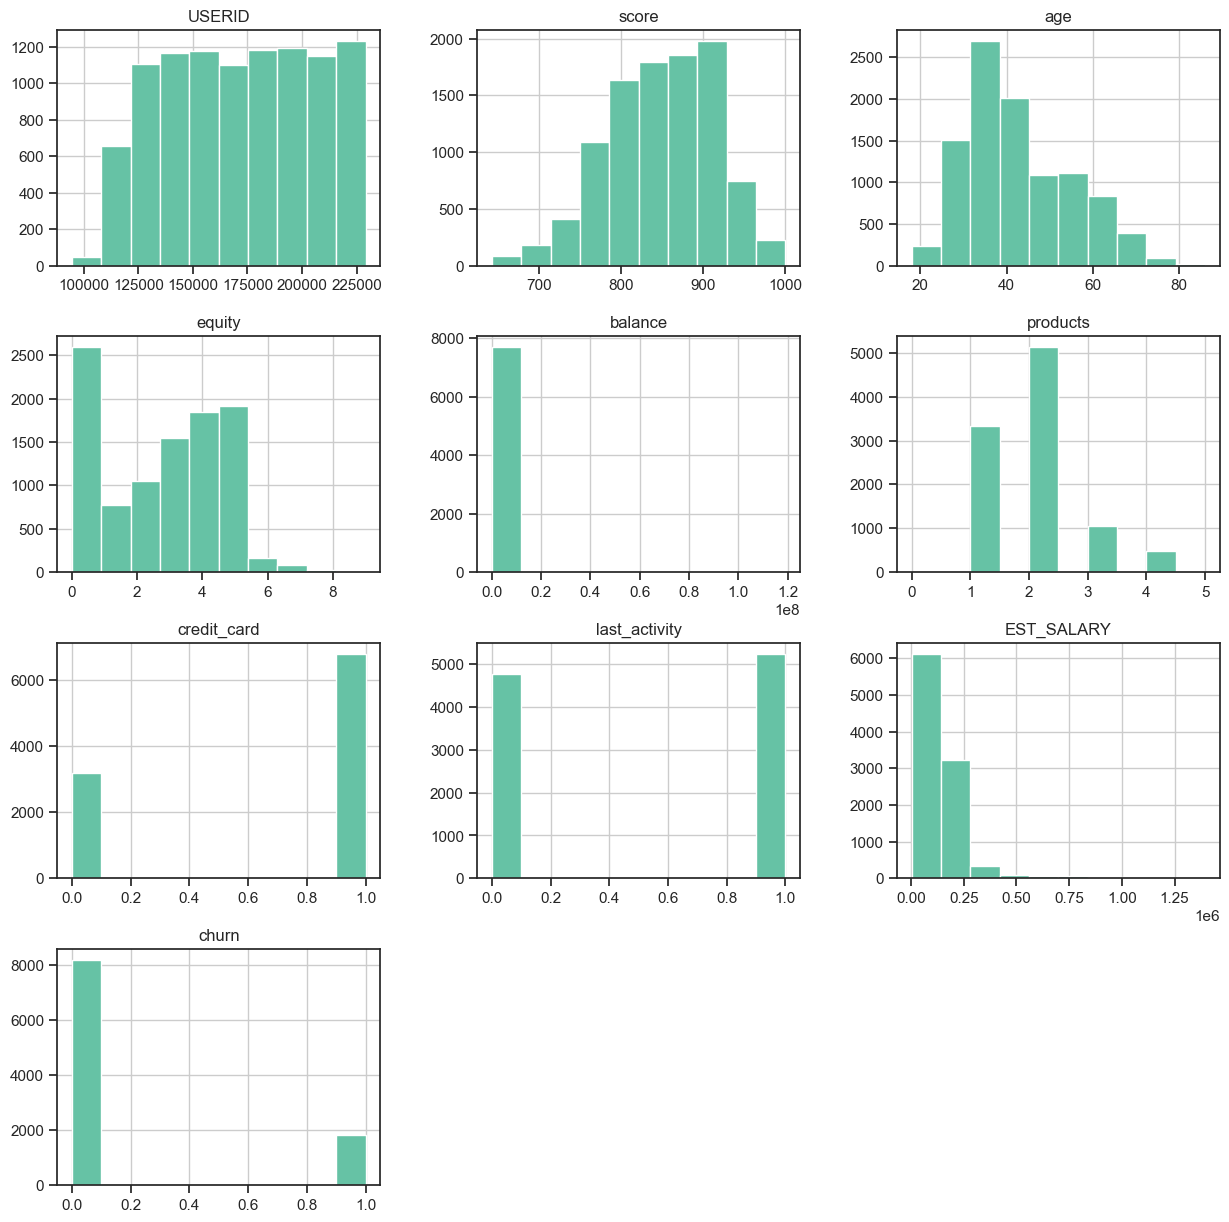

In [9]:
# строим гистограммы для количественных признаков
df.hist(figsize=(15,15))
plt.show()

## Выводы

В представленном датасете 10000 строк и 12 столбцов. Количество значений в столбцах различается, следовательно, в данных есть пропущенные значения. Наименования столбцов `USERID` и `EST_SALARY` нужно привести к нижнему регистру. Возможно, в некоторых столбцах потребуется замена типа данных.

# Предварительная обработка данных

## Замена регистра

In [10]:
# приводим наименования столбцов к более удобному виду
df = df.rename(
    columns={
        'USERID': 'user_id',
        'EST_SALARY': 'est_salary'
    }
)

## Проверка корректности значений и типов данных

Проверим соответствие уникальных значений в каждом столбце ожидаемым значениям, а также корректность типа данных.

In [11]:
# содаём функцию вывода информации о всех уникальных значений столбца по количеству и доле от общего количества
def column_info(column):
    display(
        df
        .groupby(column)[['user_id', 'churn']]
        .count()
        .assign(churn=lambda x: (x['churn'] / len(df) * 100))
        .rename(
            columns={
                'user_id': 'Количество, чел.',
                'churn': 'Доля, %'
            }
        )
    )
    print(f"Количество уникальных значений: \033[1m{df[column].nunique()}\033[0m")
    print(f"Количество дубликатов: \033[1m{df[column].duplicated().sum()}\033[0m")
    print(f"Количество пропусков: \033[1m{df[column].isna().sum()}\033[0m")
    print(f"Тип данных: \033[1m{df[column].dtypes}\033[0m")

In [12]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'user_id' по количеству и доле от общего количества
column_info('user_id')

,"Количество, чел.","Доля, %"
user_id,,
94561,1,0.01
94590,1,0.01
95384,1,0.01
95627,1,0.01
96267,1,0.01
...,...,...
229054,1,0.01
229058,1,0.01
229130,1,0.01


Количество уникальных значений: 9927
Количество дубликатов: 73
Количество пропусков: 0
Тип данных: int64


Уникальных значений в столбце `user_id` меньше, чем ожидалось, в данных присутствуют дубликаты и отсутствуют пропуски, тип данных указан верно.

In [13]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'score' по количеству и доле от общего количества
column_info('score')

,"Количество, чел.","Доля, %"
score,,
642.00,2,0.02
646.00,2,0.02
648.00,2,0.02
649.00,7,0.07
650.00,2,0.02
...,...,...
996.00,2,0.02
997.00,2,0.02
998.00,1,0.01


Количество уникальных значений: 348
Количество дубликатов: 9652
Количество пропусков: 0
Тип данных: float64


Разброс значений в столбце `score` от 642 до 1000, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных целесообразно поменять на целочисленный.

In [14]:
# меняем тип данных в столбце 'score'
df['score'] = df['score'].astype('int64')

In [15]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'city' по количеству и доле от общего количества
column_info('city')

,"Количество, чел.","Доля, %"
city,,
Ростов,1417,14.17
Рыбинск,2695,26.95
Ярославль,5888,58.88


Количество уникальных значений: 3
Количество дубликатов: 9997
Количество пропусков: 0
Тип данных: object


Всего в столбце `city` три уникальных значения, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что 2/3 клиентов банка приходятся на Ярославль, 1/4 — на Рыбинск, меньше всего — на Ростов.

In [16]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'gender' по количеству и доле от общего количества
column_info('gender')

,"Количество, чел.","Доля, %"
gender,,
Ж,4995,49.95
М,5005,50.05


Количество уникальных значений: 2
Количество дубликатов: 9998
Количество пропусков: 0
Тип данных: object


Всего в столбце `gender` два уникальных значения, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что мужчин и женщин среди клиентов банка практически поровну.

In [17]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'age' по количеству и доле от общего количества
column_info('age')

,"Количество, чел.","Доля, %"
age,,
18.00,13,0.13
19.00,16,0.16
20.00,23,0.23
21.00,15,0.15
22.00,27,0.27
...,...,...
81.00,4,0.04
82.00,2,0.02
83.00,3,0.03


Количество уникальных значений: 68
Количество дубликатов: 9931
Количество пропусков: 26
Тип данных: float64


Разброс значений в столбце `age` от 18 до 86 лет, в данных присутствуют допустимые дубликаты и пропуски, тип данных целесообразно поменять на целочисленный, однако наличие пропусков не позволяет это сделать. С пропусками разберёмся позже.

In [18]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'equity' по количеству и доле от общего количества
column_info('equity')

,"Количество, чел.","Доля, %"
equity,,
0,2592,25.92
1,774,7.74
2,1052,10.52
3,1543,15.43
4,1850,18.50
5,1918,19.18
6,161,1.61
7,80,0.80
8,17,0.17


Количество уникальных значений: 10
Количество дубликатов: 9990
Количество пропусков: 0
Тип данных: int64


Всего в столбце `equity` десять уникальных значений, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что более 1/4 клиентов банков не имеют собственности, а количество обеспеченных клиентов банка, у кого более пяти баллов, ничтожно мало.

In [19]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'balance' по количеству и доле от общего количества
column_info('balance')

,"Количество, чел.","Доля, %"
balance,,
0.00,2,0.02
6.00,1,0.01
7.00,1,0.01
20.00,1,0.01
21.00,1,0.01
...,...,...
25727761.86,1,0.01
29008931.92,1,0.01
43277099.84,1,0.01


Количество уникальных значений: 7701
Количество дубликатов: 2298
Количество пропусков: 2295
Тип данных: float64


В данных присутствуют допустимые дубликаты и пропуски, тип данных указан верно.

In [20]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'products' по количеству и доле от общего количества
column_info('products')

,"Количество, чел.","Доля, %"
products,,
0,1,0.01
1,3341,33.41
2,5126,51.26
3,1039,10.39
4,474,4.74
5,19,0.19


Количество уникальных значений: 6
Количество дубликатов: 9994
Количество пропусков: 0
Тип данных: int64


Всего в столбце `products` шесть значений, должно ли так быть? В данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно.  
У единственного клиента банка вообще отсутствуют банковские продукты, выглядит как выброс, т.к. нельзя быть клиентом банка и не иметь хотя бы одного одного его продукта. Половина клиентов использует два банковских продукта, а треть — единственный продукт. Доля клиентов банка, использующих банковские продукты по максимуму, ничтожно мало, оставшиеся используют три или четыре продукта.

In [21]:
# выводим запись клиента банка, у которого отсутствуют продукты банка
df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1


Неактивная ушедшая пожилая пенсионерка с неизвестным балансом и небольшим доходом, без кредитной карты и любых других банковских продуктов...  
Запись следует либо удалить, либо заменить пропуск корректным значением, которое нам неизвестно. Удалим эту запись.

In [22]:
# удаляем запись клиента банка у которого отсутствуют продукты банка
df = df.drop(df.query('products == 0').index)

In [23]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'credit_card' по количеству и доле от общего количества
column_info('credit_card')

,"Количество, чел.","Доля, %"
credit_card,,
0,3195,31.95
1,6804,68.05


Количество уникальных значений: 2
Количество дубликатов: 9997
Количество пропусков: 0
Тип данных: int64


Всего в столбце `credit_card` два уникальных значения, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что 2/3 клиентов банка имеют кредитные карты.

In [24]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'last_activity' по количеству и доле от общего количества
column_info('last_activity')

,"Количество, чел.","Доля, %"
last_activity,,
0,4764,47.64
1,5235,52.36


Количество уникальных значений: 2
Количество дубликатов: 9997
Количество пропусков: 0
Тип данных: int64


Всего в столбце `last_activity` два уникальных значения, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что активных и пассивных клиентов банка примерно поровну.

In [25]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'est_salary' по количеству и доле от общего количества
column_info('est_salary')

,"Количество, чел.","Доля, %"
est_salary,,
2546.30,1,0.01
3487.33,1,0.01
5043.14,1,0.01
5341.50,1,0.01
7054.82,1,0.01
...,...,...
1296838.08,1,0.01
1307090.18,1,0.01
1333687.36,1,0.01


Количество уникальных значений: 9995
Количество дубликатов: 4
Количество пропусков: 0
Тип данных: float64


В данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно.  
Несколько странно выглядят минимальные значения дохода клиентов банка на фоне минимального значения МРОТ в Ярославской области.  
Например, с 01.01.2022г. МРОТ должен быть не менее 13890 рублей независимо от организационно-правовой формы.  
Либо это выбросы, либо клиенты работают на неполную ставку.  
**Источник:** https://assistentus.ru/mrot/v-yaroslavskoj-oblasti

In [26]:
# вывзываем функцию, выводим информацию о всех уникальных значениях столбца 'churn' по количеству и доле от общего количества
column_info('churn')

,"Количество, чел.","Доля, %"
churn,,
0,8180,81.81
1,1819,18.19


Количество уникальных значений: 2
Количество дубликатов: 9997
Количество пропусков: 0
Тип данных: int64


Всего в столбце `churn` два уникальных значения, как и должно быть, в данных присутствуют допустимые дубликаты и отсутствуют пропуски, тип данных указан верно. Видим, что ушедших клиентов чуть более 18%.

In [27]:
# выводим общую информацию после замены типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   int64  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.5+ KB


## Проверка наличия и обработка пропусков

Как мы знаем, пропуски можно классифицировать следующим образом:
- **MCAR (Missing Completely At Random)** — механизм формирования пропусков, при котором вероятность пропуска для каждой записи набора одинакова. Например, если проводился социологический опрос, в котором каждому десятому респонденту один случайно выбранный вопрос не задавался, причем на все остальные заданные вопросы респонденты отвечали, то имеет место механизм MCAR. В таком случае игнорирование/исключение записей, содержащих пропущенные данные, не ведет к искажению результатов.
- **MAR (Missing At Random)** — на практике данные обычно пропущены не случайно, а ввиду некоторых закономерностей. Пропуски относят к MAR, если вероятность пропуска может быть определена на основе другой имеющейся в наборе данных информации (пол, возраст, занимаемая должность, образование…), не содержащей пропуски. В таком случае удаление или замена пропусков на значение «Пропуск», как и в случае MCAR, не приведет к существенному искажению результатов.
- **MNAR (Missing Not At Random)** — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. MNAR предполагает, что вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует. Как следствие, вероятность пропуска невозможно выразить на основе информации, содержащейся в наборе данных.

In [28]:
# выводим таблицу пропусков
(
    df
    .isna()
    .agg(['sum', 'mean'])
    .T
    .sort_values(by='sum', ascending=False)
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .rename(
        columns={
            'sum': 'Количество пропусков, шт.',
            'mean': 'Доля пропусков, %'
        }
    )
)

,"Количество пропусков, шт.","Доля пропусков, %"
balance,2294.00,22.94
age,26.00,0.26
user_id,0.00,0.00
score,0.00,0.00
city,0.00,0.00
gender,0.00,0.00
equity,0.00,0.00
products,0.00,0.00
credit_card,0.00,0.00
last_activity,0.00,0.00


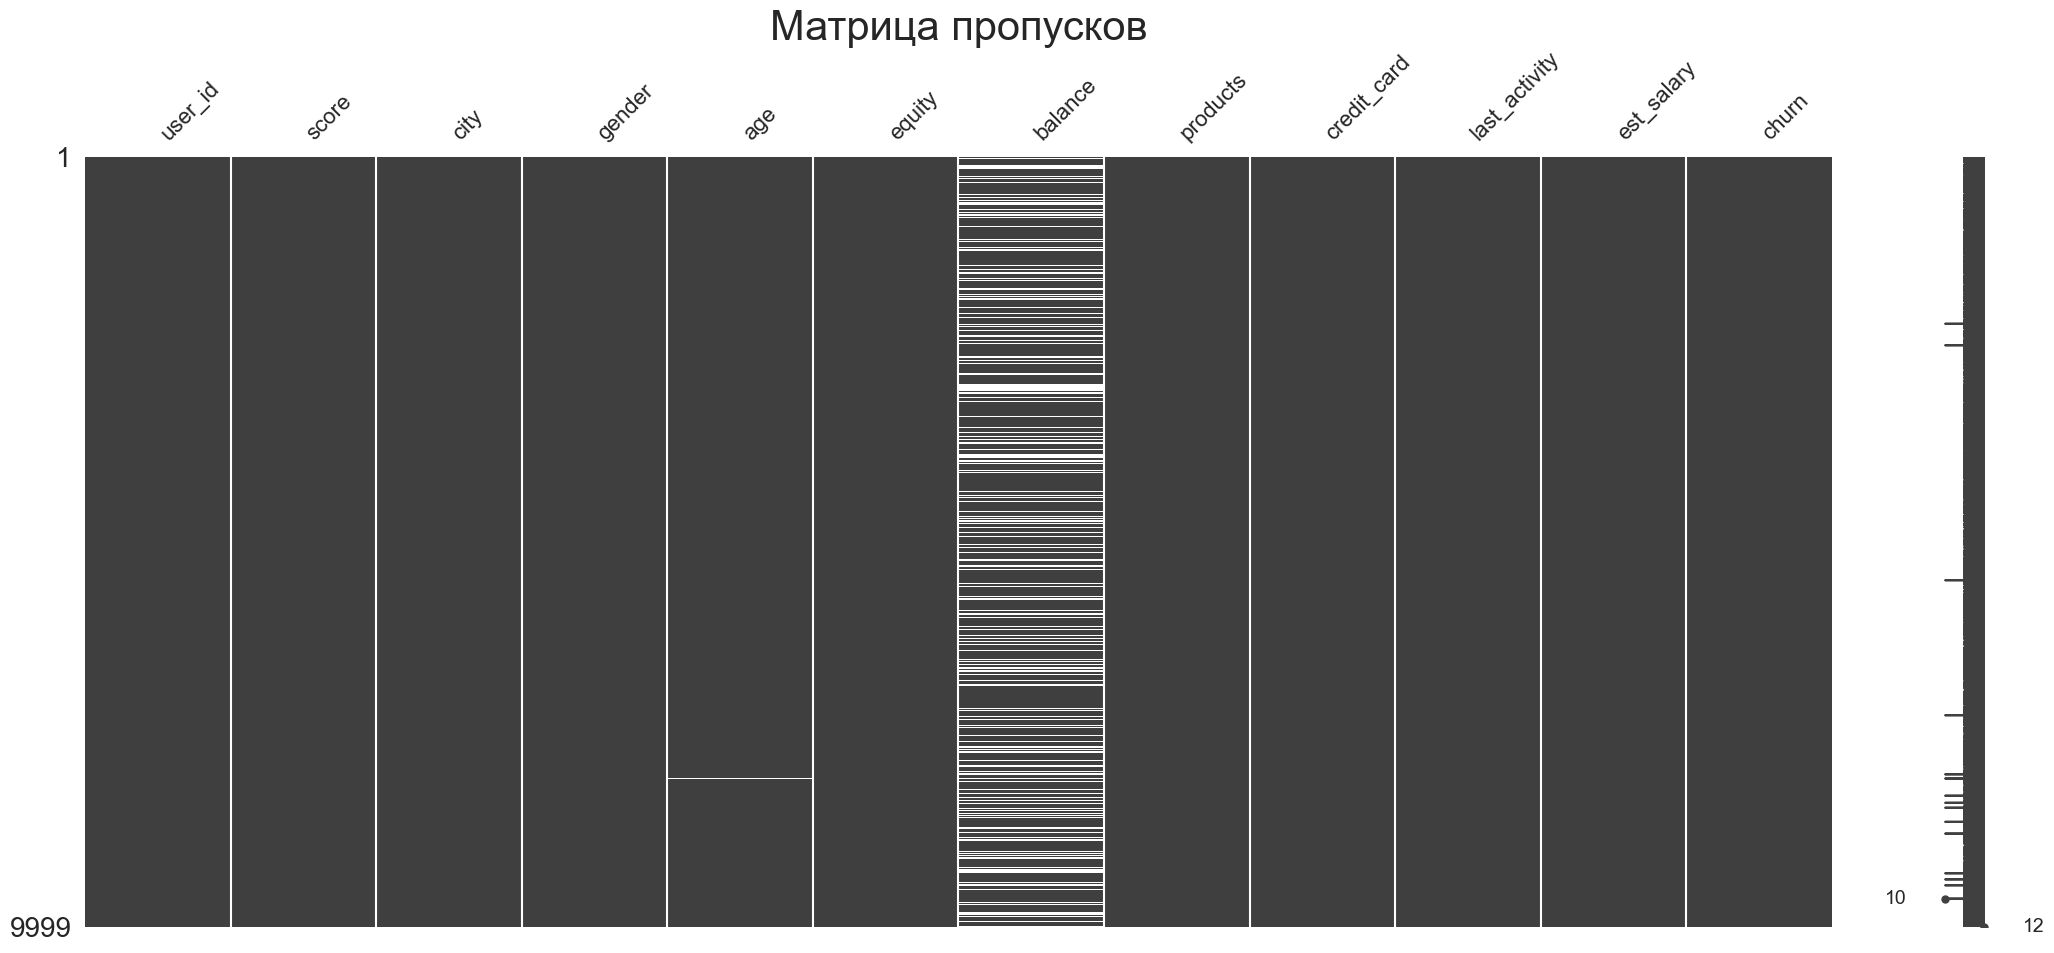

In [29]:
# выводим матрицу пропусков
msno.matrix(df)
plt.title('Матрица пропусков', fontsize=30)
plt.show()

Пропуски в столбце `age` мизерны, а в столбце `balance` многочисленны и распределены по всему диапазону записей.

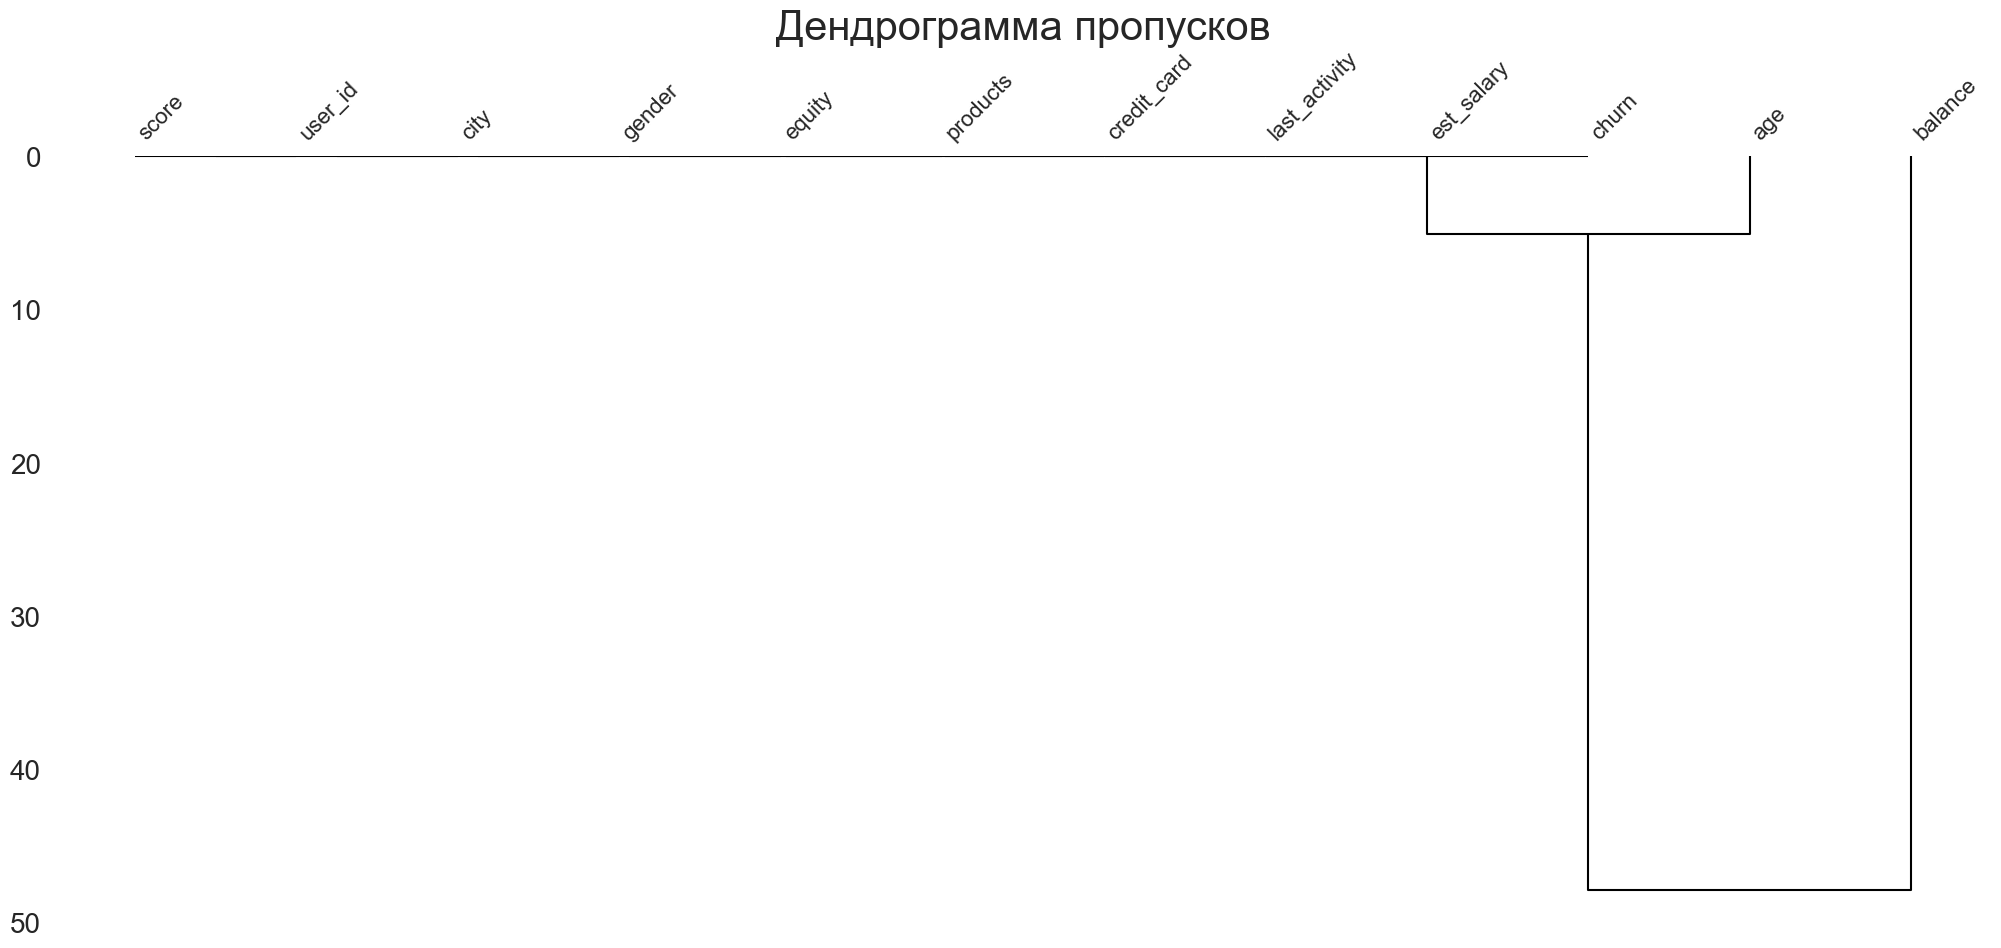

In [30]:
# выводим дендрограмму пропусков
msno.dendrogram(df)
plt.title('Дендрограмма пропусков', fontsize=30)
plt.show()

Дендрограмма — это древовидный граф, созданный с помощью иерархической кластеризации. В ней объединяются столбцы, которые сильно коррелируют по пропускам. Если несколько столбцов сгруппированы вместе на самом верхнем уровне, то наличие пропусков в одном из этих столбцов напрямую связано с наличием или отсутствием пропусков в других столбцах. Чем дальше друг от друга расположены столбцы в дереве, тем меньше вероятность, что пропуски будут совпадать между столбцами.  
Столбцы `score`, `user_id`, `city`, `gender`, `equity`, `products`, `credit_card`, `last_activity`, `est_salary`, `churn` находятся на нулевой отметке и в них нет пропусков.  
Столбец `balance` находится справа отдельно от остальных и в нём много пропусков.  
Столбец `age` находится в группе вместе с `churn` и `est_salary`, поэтому пропуски *могут быть* связаны с этими двумя столбцами.

Определим корреляцию методом `corr` и вычислим коэффициент корреляции Спирмена.  
Для этого предварительно дополним датафрейм новыми столбцами, в которых закодируем значения столбцов с пропусками.

In [31]:
# создаём копию
df_corr = df.copy(deep=True)

# кодируем столбцы с пропусками `age` и `balance`
df_corr['age'] = df_corr['age'].isna().astype('int64')
df_corr['balance'] = df_corr['balance'].isna().astype('int64')

# кодируем столбцы 'city' и 'gender'
df_corr['city'] = pd.factorize(df_corr['city'])[0]
df_corr['gender'] = pd.factorize(df_corr['gender'])[0]

# удаляем лишние столбцы
df_corr = df_corr.drop(['user_id'], axis=1)

In [32]:
# выводим матрицу корреляции признаков
df_corr.corr(method='spearman')

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,-0.02,0.02,0.01,0.02,0.24,-0.09,-0.08,-0.03,0.25,0.10
city,-0.02,1.00,0.00,-0.02,0.02,-0.02,0.02,-0.01,-0.03,-0.02,0.03
gender,0.02,0.00,1.00,0.00,-0.02,0.06,-0.04,0.13,-0.01,0.12,0.14
age,0.01,-0.02,0.00,1.00,-0.03,0.05,-0.04,0.01,0.03,0.01,-0.02
equity,0.02,0.02,-0.02,-0.03,1.00,-0.70,0.46,-0.17,-0.00,-0.18,0.27
balance,0.24,-0.02,0.06,0.05,-0.70,1.00,-0.55,0.16,0.03,0.34,-0.25
products,-0.09,0.02,-0.04,-0.04,0.46,-0.55,1.00,-0.29,0.01,-0.17,0.27
credit_card,-0.08,-0.01,0.13,0.01,-0.17,0.16,-0.29,1.00,-0.03,0.02,-0.13
last_activity,-0.03,-0.03,-0.01,0.03,-0.00,0.03,0.01,-0.03,1.00,-0.01,0.17
est_salary,0.25,-0.02,0.12,0.01,-0.18,0.34,-0.17,0.02,-0.01,1.00,0.04


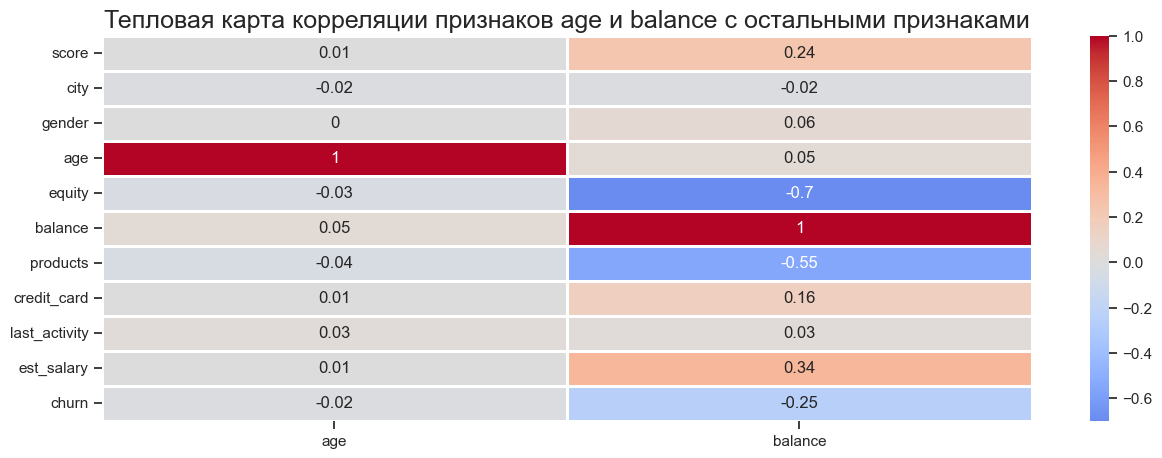

In [33]:
# выводим тепловую карту корреляции признаков
sns.heatmap(
    (
        df_corr
        .corr(method='spearman')
        .round(2)
        [['age', 'balance']]
    ),
    annot=True,
    center=0,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white'
)
plt.title('Тепловая карта корреляции признаков age и balance с остальными признаками', fontsize=18)
plt.show()

Шкала Чеддока используется для оценки силы связи коэффициентов корреляции. Градации шкалы:
- от 0,0 до 0,3 — очень слабая
- от 0,3 до 0,5 — слабая
- от 0,5 до 0,7 — средняя
- от 0,7 до 0,9 — сильная
- от 0,9 до 1,0 — очень сильная

Судя по шкале Чеддока, признак `age` вообще никак не связан с остальными признаками, а у признака `balance` сильная отрицательная связь с `equity`, средняя отрицательная с `products`, слабая положительная с `est_salary`, очень слабая положительная с `score` и `credit_cars`, очень слабая отрицательная с `churn` и отсутствует с `age` и `last_activity`.

In [34]:
# содаём функцию вывода информации о значениях признаков
def column_stat(df, column):
    display(df)
    print(f"Статистика по столбцу: \033[1m{column}\033[0m")
    print(f"Количество клиентов: \033[1m{df['user_id'].count()}\033[0m")
    print(f"Средний балл кредитного скоринга: \033[1m{df['score'].mean().round(1)}\033[0m")
    print(f"Отделения банка: \033[1m{df['city'].unique()}\033[0m")
    print(f"Количество мужчин и женщин: \033[1m{df.loc[df['gender'] == 'М']['user_id'].count()}\033[0m и \
\033[1m{df.loc[df['gender'] == 'Ж']['user_id'].count()}\033[0m")
    print(f"Средний возраст: \033[1m{df['age'].mean()}\033[0m")  # округление вызывает ошибку
    print(f"Средний балл собственности: \033[1m{df['equity'].mean().round(1)}\033[0m")
    print(f"Средний баланс на счёте: \033[1m{df['balance'].mean()}\033[0m")  # округление вызывает ошибку
    print(f"Среднее количество используемых продуктов: \033[1m{df['products'].mean().round(1)}\033[0m")
    print(f"Количество клиентов с кредитной картой: \033[1m{df.loc[df['credit_card'] == 1]['user_id'].count()}\033[0m")
    print(f"Количество активных клиентов: \033[1m{df.loc[df['last_activity'] == 1]['user_id'].count()}\033[0m")
    print(f"Средний оценочный доход: \033[1m{df['est_salary'].mean().round(1)}\033[0m")
    print(f"Количество ушедших клиентов: \033[1m{df.loc[df['churn'] == 1]['user_id'].count()}\033[0m")

In [35]:
# вызываем функцию, выводим записи с пропусками в столбце 'age' и информацию о значениях признаков
column_stat(df.query('age.isna()'), 'age')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Статистика по столбцу: age
Количество клиентов: 26
Средний балл кредитного скоринга: 855.2
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 14 и 12
Средний возраст: nan
Средний балл собственности: 1.4
Средний баланс на счёте: 1250033.573
Среднее количество используемых продуктов: 1.3
Количество клиентов с кредитной картой: 20
Количество активных клиентов: 20
Средний оценочный доход: 178585.2
Количество ушедших клиентов: 1


Таким образом, в отношении пропусков в столбце `age` можно констатировать, что: практически все клиенты активны, имеют кредитные карты и высокие средние показатели кредитного скоринга, баланса и оценочного дохода. А единственный ушедший клиент из этого числа, хоть и не имеет кредитной карты, но является активным, пользуется банковскими продуктами и имеет хорошие показатели по балансу, доходу и собственности.  
Считаем, что пропуски в столбце `age` можно отнести к категории `MCAR` (полностью случайные пропуски) и могут быть удалены в силу своей малочисленности (отчасти это удаление затронет и пропуски в столбце `balance`).

In [36]:
# удаляем записи с пропусками с столбце `age`
df = df.dropna(subset=['age'])

# меняем тип данных в столбце 'age'
df['age'] = df['age'].astype('int64')

In [37]:
# вызываем функцию, выводим записи с пропусками в столбце 'balance' и информацию о значениях признаков
column_stat(df.query('balance.isna()'), 'balance')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876,Ростов,М,38,0,NaN,1,0,0,171763.69,0
9984,125941,729,Ярославль,Ж,42,0,NaN,1,1,1,687538.70,0
9993,219924,884,Рыбинск,Ж,36,0,NaN,1,1,1,169844.88,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0


Статистика по столбцу: balance
Количество клиентов: 2278
Средний балл кредитного скоринга: 865.3
Отделения банка: ['Рыбинск' 'Ярославль' 'Ростов']
Количество мужчин и женщин: 1272 и 1006
Средний возраст: 42.07682177348551
Средний балл собственности: 0.1
Средний баланс на счёте: nan
Среднее количество используемых продуктов: 1.2
Количество клиентов с кредитной картой: 1858
Количество активных клиентов: 1251
Средний оценочный доход: 226433.8
Количество ушедших клиентов: 12


Таким образом, в отношении пропусков в столбце `balance` можно констатировать, что: практически все клиенты остались, более половины активны, большинство имеют кредитные карты, почти все без собственности, банковские продукты используют по минимуму, имеют высокие показатели кредитного скоринга и оценочного дохода, в среднем уже состоявшиеся люди далеко не юнцы.  
Считаем, что пропуски в столбце `balance` можно отнести к категории `MNAR` (неслучайные пропуски) и не могут быть удалены в силу своей многочисленности, а замена на среднее или медианное значение внесёт неприемлемые искажения в дальнейший анализ и выводы. Предлагаем оставить пропуски без обработки.

In [38]:
# выводим общую информацию после удаления пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB


## Проверка наличия и обработка дубликатов

In [39]:
# выводим количество явных дубликатов
df.duplicated().sum()

0

При анализе пропусков было выявлено наличие дубликатов в столбец `user_id`. Взглянем на них.

In [40]:
# выводим количество дубликатов в столбце `user_id`
df['user_id'].duplicated().sum()

50

In [41]:
# выводим дубликаты в столбце `user_id`
(
    df
    .query('user_id.duplicated(keep=False)')
    .sort_values(by='user_id')
    .head(10)
)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


In [42]:
# выводим количество дубликатов в столбцах `user_id` и 'city'
df[['user_id', 'city']].duplicated().sum()

0

In [43]:
# выводим города, где есть дубликаты в столбце `user_id`
(
    df
    .query('user_id.duplicated(keep=False)')['city']
    .value_counts()
)

Рыбинск      50
Ярославль    50
Name: city, dtype: int64

Очевидно, что после ухода старого клиента его `user_id` присваивался новому клиенту. Это не очень правильно, но такова была практика сотрудников отделений банка в Ярославле и Рыбинске — они повторно использовали освободившиеся пользовательские идентификаторы друг друга. Похвалим сотрудников отделения банка в Ростове за неучастие в этом процессе.

## Проверка количественных значений

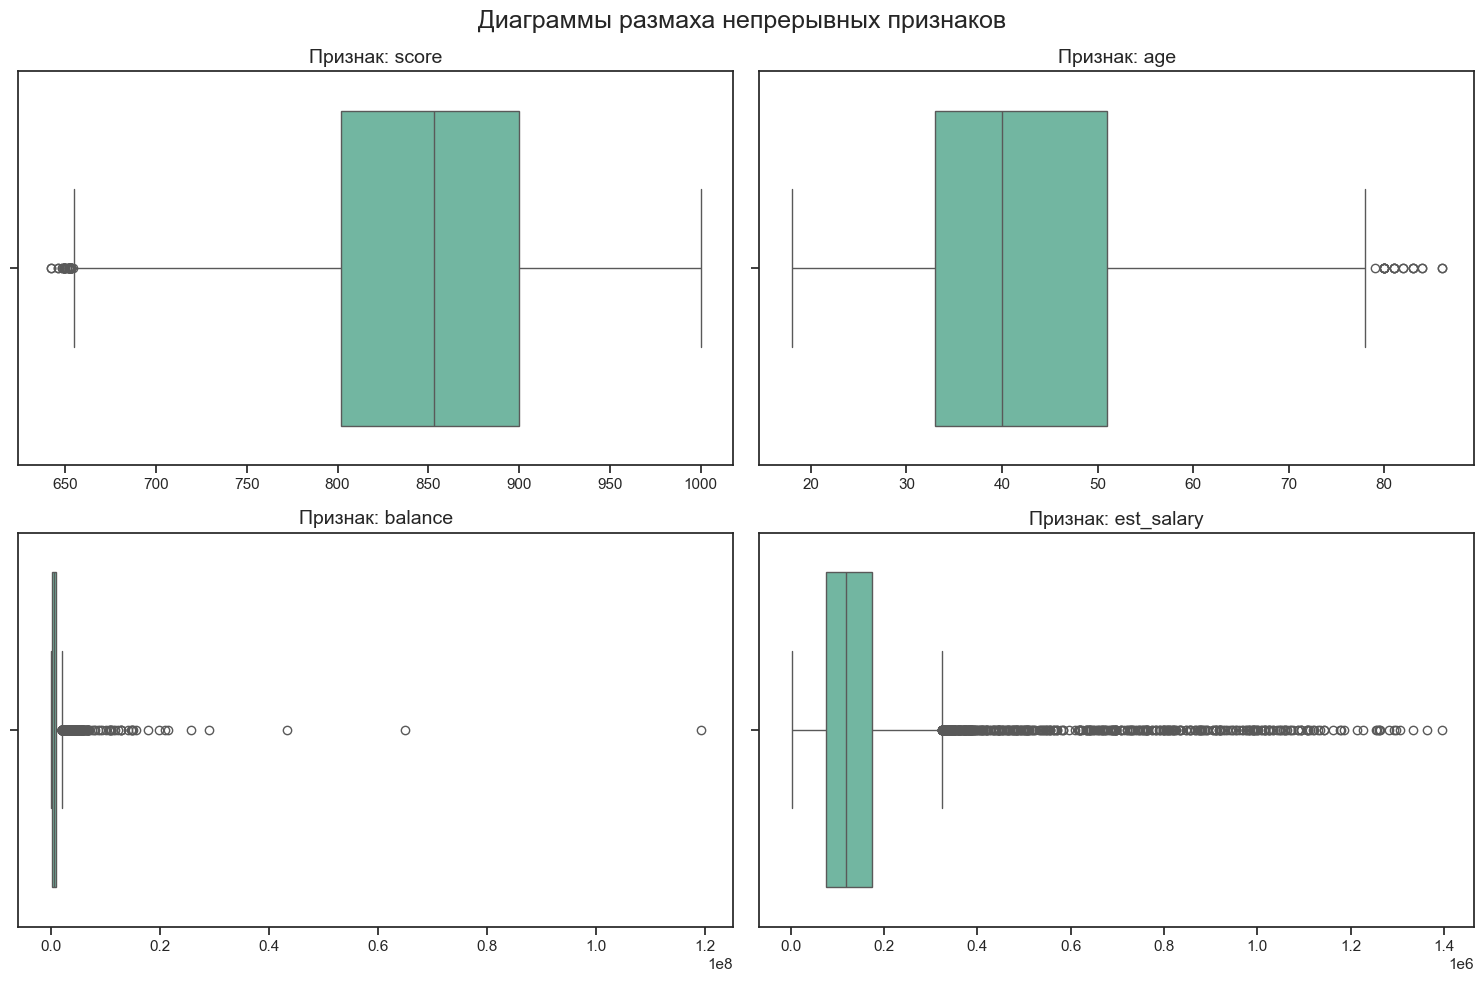

In [44]:
# строим диаграммы размаха для количественных непрерывных признаков
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
new_axes = [item for sublist in axes for item in sublist]
for feature, column in enumerate(['score', 'age', 'balance', 'est_salary']):
    sns.boxplot(
        data=df,
        x=column,
        ax=new_axes[feature]
    )
    new_axes[feature].set_title(f'Признак: {column}', fontsize=14)
    new_axes[feature].set_xlabel('')
fig.suptitle('Диаграммы размаха непрерывных признаков', fontsize=18)
plt.tight_layout()
plt.show()

In [45]:
# создаём функцию для выборки выбросов
def outliers(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    return df.loc[~((df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr))]

In [46]:
# создаём функцию для фильтрации выбросов
def not_outliers(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    return df.loc[((df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr))]

In [47]:
# создаём функцию для вывода границ выбросов и значений перцентилей
def column_quantile(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    
    print(f"Нижняя граница выбросов равна \033[1m{round((q1 - 1.5 * iqr), 0)}\033[0m, верхняя граница выбросов равна \
\033[1m{round((q3 + 1.5 * iqr), 0)}\033[0m, количество клиентов в выборке выбросов составляет \
\033[1m{df.loc[~((df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr)), 'user_id'].count()}\033[0m человек.")

    print(f"\033[1m1\033[0m-й перцентиль равен \033[1m{df[column].quantile(0.01).round(0)}\033[0m, количество клиентов \
за его пределами составляет \033[1m{df.loc[df[column] < df[column].quantile(0.01), 'user_id'].count()}\033[0m человек.")
    
    print(f"\033[1m5\033[0m-й перцентиль равен \033[1m{df[column].quantile(0.05).round(0)}\033[0m, количество клиентов \
за его пределами составляет \033[1m{df.loc[df[column] < df[column].quantile(0.05), 'user_id'].count()}\033[0m человек.")
    
    print(f"\033[1m95\033[0m-й перцентиль равен \033[1m{df[column].quantile(0.95).round(0)}\033[0m, количество клиентов \
за его пределами составляет \033[1m{df.loc[df[column] > df[column].quantile(0.95), 'user_id'].count()}\033[0m человек.")
    
    print(f"\033[1m99\033[0m-й перцентиль равен \033[1m{df[column].quantile(0.99).round(0)}\033[0m, количество клиентов \
за его пределами составляет \033[1m{df.loc[df[column] > df[column].quantile(0.99), 'user_id'].count()}\033[0m человек.")

**Рассмотрим каждый признак по отдельности.**

In [48]:
# вызываем функцию, выводим записи с выбросами в столбце 'score' и информацию о значениях признаков
column_stat(outliers(df, 'score').sort_values(by='score'), 'score')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7066,187450,642,Ростов,Ж,64,0,NaN,1,1,0,26429.40,0
2532,151179,642,Рыбинск,М,69,0,NaN,1,1,1,35917.41,0
5131,213745,646,Рыбинск,Ж,25,0,NaN,2,1,0,60562.33,0
921,179302,646,Ярославль,М,37,0,NaN,1,1,1,148297.71,0
4690,135725,648,Ярославль,Ж,59,0,NaN,1,1,1,50326.03,0
4071,164000,648,Ярославль,М,28,0,NaN,1,1,0,27790.15,0
9827,174930,649,Рыбинск,Ж,60,0,NaN,1,1,0,64781.16,0
9329,196787,649,Ярославль,Ж,32,0,NaN,1,1,1,102880.16,0
6751,182172,649,Ярославль,М,38,0,NaN,1,1,1,170288.90,0
3168,173067,649,Ярославль,М,46,0,NaN,1,1,1,121654.31,0


Статистика по столбцу: score
Количество клиентов: 33
Средний балл кредитного скоринга: 650.3
Отделения банка: ['Ростов' 'Рыбинск' 'Ярославль']
Количество мужчин и женщин: 22 и 11
Средний возраст: 44.75757575757576
Средний балл собственности: 0.0
Средний баланс на счёте: nan
Среднее количество используемых продуктов: 1.1
Количество клиентов с кредитной картой: 33
Количество активных клиентов: 23
Средний оценочный доход: 108891.1
Количество ушедших клиентов: 0


In [49]:
# вызываем функцию, выводим границы выбросов и перцентилей в столбце 'score'
column_quantile(df,'score')

Нижняя граница выбросов равна 655.0, верхняя граница выбросов равна 1047.0, количество клиентов в выборке выбросов составляет 33 человек.
1-й перцентиль равен 687.0, количество клиентов за его пределами составляет 98 человек.
5-й перцентиль равен 737.0, количество клиентов за его пределами составляет 487 человек.
95-й перцентиль равен 946.0, количество клиентов за его пределами составляет 482 человек.
99-й перцентиль равен 978.0, количество клиентов за его пределами составляет 99 человек.


Не наблюдаем отрицательных, околонулевых или заведомо невозможных минимальных/максимальных значений. Вполне реально, что кредитный скоринг соответствует факту: большинство клиентов активны, обслуживаются во всех отделениях банка, все имеют кредитные карты, хороший средний оценочный доход и неизвестный баланс на счетах, находятся в разных возрастных категориях и гендерах, многие активны и ни одного ушедшего.  
В общем, закредитованные трудяги.

In [50]:
# вызываем функцию, выводим записи с выбросами в столбце 'age' и информацию о значениях признаков
column_stat(outliers(df, 'age').sort_values(by='age'), 'age')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7569,161512,892,Ярославль,Ж,79,3,337392.63,2,1,0,103858.46,0
219,161758,754,Ярославль,Ж,80,1,332616.82,3,0,1,114804.27,0
9302,168360,960,Рыбинск,Ж,80,0,NaN,1,0,1,548776.90,0
4703,219171,851,Ростов,Ж,80,3,411612.85,1,1,1,22280.91,0
9462,140275,898,Ярославль,Ж,80,2,1331131.18,2,1,1,107008.80,0
396,205650,869,Ростов,Ж,80,4,570064.04,2,0,0,25503.20,0
540,188460,720,Ярославль,Ж,80,0,NaN,1,1,1,153804.84,0
1283,127231,796,Рыбинск,Ж,80,1,347590.32,2,1,0,27123.50,0
5602,151854,707,Ярославль,Ж,81,0,NaN,1,1,0,102360.77,0
5673,147965,854,Ярославль,Ж,81,3,803337.98,2,0,1,50386.82,0


Статистика по столбцу: age
Количество клиентов: 21
Средний балл кредитного скоринга: 831.4
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 0 и 21
Средний возраст: 81.71428571428571
Средний балл собственности: 1.9
Средний баланс на счёте: 662205.3373333333
Среднее количество используемых продуктов: 1.7
Количество клиентов с кредитной картой: 12
Количество активных клиентов: 15
Средний оценочный доход: 95617.9
Количество ушедших клиентов: 0


In [51]:
# вызываем функцию, выводим границы выбросов и перцентилей в столбце 'age'
column_quantile(df,'age')

Нижняя граница выбросов равна 6.0, верхняя граница выбросов равна 78.0, количество клиентов в выборке выбросов составляет 21 человек.
1-й перцентиль равен 23.0, количество клиентов за его пределами составляет 94 человек.
5-й перцентиль равен 26.0, количество клиентов за его пределами составляет 376 человек.
95-й перцентиль равен 65.0, количество клиентов за его пределами составляет 490 человек.
99-й перцентиль равен 73.0, количество клиентов за его пределами составляет 83 человек.


Не наблюдаем отрицательных, околонулевых или заведомо невозможных минимальных/максимальных значений. Учитывая, что показатель ожидаемой продолжительности жизни женщин в Ярославской области на 2023 год составлял как раз 78 лет, значения в выборке не представляются нереалистичными, ведь в нашей выборке представлены исключительно женщины в возрасте 79+ с хорошим средним оценочным доходом и высоким баллом кредитного скоринга, обслуживаются во всех отделениях банка, половина имеет кредитные карты, часть очень хорошо обеспечена, многие активны и ни одной ушедшей.  
В общем, мечта альфонса.  
**Источник:** https://gogov.ru/life-expectancy/yar#data

In [52]:
# вызываем функцию, выводим записи с выбросами в столбце 'balance' и информацию о значениях признаков
column_stat(
    outliers(df, 'balance')
    .query('balance.notna()')
    .sort_values(by='balance', ascending=False),
    'balance'
)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900,Ярославль,М,62,5,119113552.01,2,1,1,138041.31,0
1059,114103,894,Ярославль,М,58,4,64866210.15,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,43277099.84,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45,5,29008931.92,2,0,1,811804.54,0
9753,122015,885,Ярославль,М,64,4,25727761.86,3,1,0,168746.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7135,170198,871,Ярославль,Ж,58,5,2013209.77,1,1,0,991490.31,0
1750,162532,894,Ярославль,М,56,5,2011608.98,2,0,1,188723.67,1
1827,150691,938,Ярославль,Ж,34,5,2011480.78,3,0,1,188466.37,1
2028,226862,872,Рыбинск,М,46,5,2011026.80,2,1,0,207625.33,0


Статистика по столбцу: balance
Количество клиентов: 427
Средний балл кредитного скоринга: 924.7
Отделения банка: ['Ярославль' 'Ростов' 'Рыбинск']
Количество мужчин и женщин: 273 и 154
Средний возраст: 45.07025761124122
Средний балл собственности: 4.3
Средний баланс на счёте: 4461754.921803279
Среднее количество используемых продуктов: 2.5
Количество клиентов с кредитной картой: 195
Количество активных клиентов: 225
Средний оценочный доход: 324997.3
Количество ушедших клиентов: 210


In [53]:
# вызываем функцию, выводим границы выбросов и перцентилей в столбце 'balance'
column_quantile(df.query('balance.notna()'),'balance')

Нижняя граница выбросов равна -730830.0, верхняя граница выбросов равна 2006580.0, количество клиентов в выборке выбросов составляет 427 человек.
1-й перцентиль равен 23230.0, количество клиентов за его пределами составляет 77 человек.
5-й перцентиль равен 100057.0, количество клиентов за его пределами составляет 385 человек.
95-й перцентиль равен 2114078.0, количество клиентов за его пределами составляет 385 человек.
99-й перцентиль равен 4827211.0, количество клиентов за его пределами составляет 77 человек.


Не наблюдаем отрицательных или околонулевых значений. Но вот максимальные значения изумляют нас и радуют собственника банка, чьими клиентами яляются местные миллионеры со средним балансом в ~4.5 млн.руб., которые обслуживаются во всех отделениях банка, многие пользуются кредитными картами, да и вообще широко используют продукты банка, имеют практически максимальные баллы кредитного скоринга и собственности, но половина уже ушла.  
Диаграмма размаха даёт нам беспристрастную оценку, а итоговое решение за нами, с учётом специфики и реалий оцениваемого бизнеса/компании. Вполне реально, что в Ярославской области, где численность населения превышает миллион человек, проживают обеспеченные люди, которые хранят в банке миллионы честно и не очень заработанных рублей.  
В общем, региональная элита.

In [54]:
# выводим пятёрку самых больших выбросов в столбце 'balance'
(
    outliers(df, 'balance')
    .query('balance.notna()')
    .sort_values(by='balance', ascending=False)
    .head()
)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900,Ярославль,М,62,5,119113552.01,2,1,1,138041.31,0
1059,114103,894,Ярославль,М,58,4,64866210.15,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,43277099.84,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45,5,29008931.92,2,0,1,811804.54,0
9753,122015,885,Ярославль,М,64,4,25727761.86,3,1,0,168746.90,0


На диаграмме размаха в зоне выбросов отчётливо выделяется трио с балансами в 119, 64 и 43 млн.руб. Замыкают пятёрку лидеров клиенты с балансами в 29 и 25 млн.руб. Вся наша великолепная пятёрка обслуживается в Ярославле.

In [55]:
# вызываем функцию, выводим записи с выбросами в столбце 'est_salary' и информацию о значениях признаков
column_stat(
    outliers(df, 'est_salary')
    .sort_values(by='est_salary', ascending=False),
    'est_salary'
)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4005,163640,912,Ярославль,М,35,4,15624095.80,2,0,1,1395064.45,0
4637,149430,961,Ярославль,М,37,5,4054667.81,3,0,0,1363549.52,0
4473,216422,956,Ярославль,М,27,0,NaN,1,1,0,1333687.36,0
1600,197637,785,Ярославль,М,41,0,NaN,1,1,0,1307090.18,0
5160,174746,731,Ярославль,Ж,30,0,NaN,2,1,0,1296838.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8187,126463,947,Ярославль,Ж,37,4,5043603.26,1,1,1,324617.52,0
7800,202757,850,Рыбинск,Ж,35,0,NaN,1,0,0,324513.02,0
4942,197121,960,Ростов,Ж,35,0,NaN,1,1,1,324423.14,0
9647,225738,719,Рыбинск,М,45,0,NaN,1,1,1,324140.65,0


Статистика по столбцу: est_salary
Количество клиентов: 479
Средний балл кредитного скоринга: 881.1
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 291 и 188
Средний возраст: 41.96242171189979
Средний балл собственности: 1.6
Средний баланс на счёте: 4452005.551270718
Среднее количество используемых продуктов: 1.6
Количество клиентов с кредитной картой: 354
Количество активных клиентов: 273
Средний оценочный доход: 631836.0
Количество ушедших клиентов: 79


In [56]:
# вызываем функцию, выводим границы выбросов и перцентилей в столбце 'est_salary'
column_quantile(df,'est_salary')

Нижняя граница выбросов равна -73620.0, верхняя граница выбросов равна 323372.0, количество клиентов в выборке выбросов составляет 479 человек.
1-й перцентиль равен 17341.0, количество клиентов за его пределами составляет 100 человек.
5-й перцентиль равен 32144.0, количество клиентов за его пределами составляет 499 человек.
95-й перцентиль равен 316367.0, количество клиентов за его пределами составляет 499 человек.
99-й перцентиль равен 886344.0, количество клиентов за его пределами составляет 100 человек.


Не наблюдаем отрицательных, околонулевых или заведомо невозможных минимальных/максимальных значений. В выборке представлены крепкие ребята: очень много активных мужчин и женщин, хорошо зарабатывающих и имеющих солидный баланс на счетах, большинство пользуются кредитными картами. Банк, видя это, присваивает им высокий балл кредитного скоринга, ушедших очень мало.  
В общем, средний класс.

В ряде случаев высокий оценочный доход можно объяснить наличием большого количества объектов собственности и арендными доходами от них, но не всегда. Но интересно ещё и другое — в категорию выбросов не попали доходы ниже прожиточного минимума, которые были замечены при анализе пропусков.

In [57]:
# вызываем функцию, выводим записи по клиентам с с оценочным доходом ниже МРОТ (13890 на 01.01.2022)
# и информацию о значениях признаков
column_stat(df.query('est_salary < 13890'), 'est_salary')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
443,207658,875,Ярославль,Ж,76,5,676450.87,3,0,1,11319.50,0
505,205035,725,Рыбинск,Ж,77,3,73.00,2,0,1,8729.84,0
1141,228620,775,Рыбинск,М,25,4,60923.17,2,1,1,13678.54,0
1520,207521,819,Рыбинск,М,63,4,597930.59,2,0,1,10677.73,0
1696,223958,855,Рыбинск,Ж,23,2,51051.41,2,1,1,13884.68,0
1700,155567,747,Ростов,М,25,0,5750.92,1,1,0,7054.82,0
1753,161271,836,Ярославль,Ж,19,4,7703.05,4,1,1,5043.14,0
1883,151268,852,Ростов,Ж,63,5,373070.37,1,1,1,8587.79,0
1988,160979,788,Рыбинск,М,24,4,118438.82,2,1,0,8401.97,0
2025,142089,963,Ярославль,Ж,63,3,1087069.93,3,1,0,12379.72,0


Статистика по столбцу: est_salary
Количество клиентов: 45
Средний балл кредитного скоринга: 821.0
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 17 и 28
Средний возраст: 45.022222222222226
Средний балл собственности: 3.2
Средний баланс на счёте: 269032.0795555556
Среднее количество используемых продуктов: 2.1
Количество клиентов с кредитной картой: 32
Количество активных клиентов: 27
Средний оценочный доход: 10148.5
Количество ушедших клиентов: 1


На фоне достойного баланса, хорошего балла кредитного скоринга и собственности, оценочный доход выглядит довольно нелепо. Вообще было бы интересно взглянуть на методику кредитного скоринга.  
В общем, бюджетники.

In [58]:
# выводим общее количество выбросов по всем непрерывным признакам по формальным основаниям
outliers_index = []
for column in ['score', 'age', 'balance', 'est_salary']:
    outliers_index.extend(
        outliers(df, column)
        .loc[df[column]
        .notna()]
        .index
    )
print(f'Таким образом, удаление всех выбросов по формальным основаниям может лишить нас записей в количестве \
\033[1m{len(set(outliers_index))}\033[0m шт., что составит \033[1m{len(set(outliers_index))/df_copy.shape[0]:.2%}\033[0m \
от исходного размера, что не есть правильно.')

Таким образом, удаление всех выбросов по формальным основаниям может лишить нас записей в количестве 841 шт., что составит 8.41% от исходного размера, что не есть правильно.


In [59]:
# выводим общую информацию после обработки выбросов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.2+ MB


In [60]:
print(f"После предварительной обработки данных, в датафрейме осталось \033[1m{df.shape[0]}\033[0m записей, что составляет \
\033[1m{df.shape[0]/df_copy.shape[0]:.2%}\033[0m от исходного размера. Хороший результат :-)")

После предварительной обработки данных, в датафрейме осталось 9973 записей, что составляет 99.73% от исходного размера. Хороший результат :-)


## Выводы
На этапе предварительной обработки данных мы проверили:
- Корректность наименований: привели к единому стилю наименования столбцов;
- Соответствие значений и типов данных: в ряде случае изменили на тип данных на более корректный , удалили одну ошибочную запись;
- Наличие пропусков: в столбце `age` удалили пропуски, носящие полностью случайный характер, и в столбце `balance` оставили без обработки пропуски, носящие неслучайный характер;
- Наличие дубликатов: выявленные дубликаты в стоблце `user_id` принадлежат разным клиентам из разных городов, поэтому оставили их без обработки;
- Наличие выбросов в ряде столбцов: рассмотрели подробно каждый признак, все выбросы оставили без обработки, т.к. нет достоверного подтверждения их аномальности. Удаление выбросов без веских причин могло бы привести к потере важной информации и ухудшению качества выводов.

# Исследовательский анализ данных

## Анализ распределения признаков в разрезе оттока

In [61]:
# создаём вспомогательный словарь для последующего использования в функциях
columns_dict ={
    'score': [
        'Распределение клиентов по количеству баллов кредитного рейтинга в разрезе оттока',
        'Количество баллов кредитного рейтинга, ед.'
    ],
    'age': [
        'Распределение клиентов по возрастам в разрезе оттока',
        'Возраст, лет'
    ],
    'balance': [
        'Распределение клиентов по размеру баланса в разрезе оттока',
        'Баланс, млн.руб.'
    ],
    'est_salary': [
        'Распределение клиентов по размеру оценочного дохода в разрезе оттока',
        'Оценочный доход, руб.'
    ],
    'city': [
        'Распределение клиентов по городам в разрезе оттока',
        'Количество клиентов по городам в разрезе оттока',
        'Доля оттока клиентов по городам',
        'Города'
    ],
    'gender': [
        'Распределение клиентов по гендерам в разрезе оттока',
        'Количество клиентов по гендерам в разрезе оттока',
        'Доля оттока клиентов по гендерам',
        'Гендеры'
    ],
    'equity': [
        'Распределение клиентов по количеству баллов собственности в разрезе оттока',
        'Количество клиентов по количеству баллов собственности',
        'Доля оттока клиентов по количеству баллов собственности',
        'Количество баллов собственности, ед.'
    ],
    'products': [
        'Распределение клиентов по количеству продуктов в разрезе оттока',
        'Количество клиентов по количеству продуктов',
        'Доля оттока клиентов по количеству продуктов',
        'Количество продуктов, ед.'
    ],
    'credit_card': [
        'Распределение клиентов по наличию кредитной карты в разрезе оттока',
        'Количество клиентов по наличию кредитной карты',
        'Доля оттока клиентов по наличию кредитной карты',
        'Наличие кредитной карты'
    ],
    'last_activity': [
        'Распределение клиентов по наличию активности в разрезе оттока',
        'Количество клиентов по наличию активности',
        'Доля оттока клиентов по наличию активности',
        'Наличие активности'
    ]
}

### Распределение оттока клиентов по непрерывным признакам

In [62]:
# создаём функцию вывода графиков по непрерывным признакам
def continuous_values_graph(df, column):
    sns.histplot(
        data=df,
        x=column,
        hue='churn',
        kde=True,
        stat='density',
        common_norm=False
    )
    plt.title(columns_dict[column][0], fontsize=14)
    plt.xlabel(columns_dict[column][1])
    plt.ylabel('Плотность распределения')
    plt.legend(['Ушли', 'Остались'])
    plt.show()

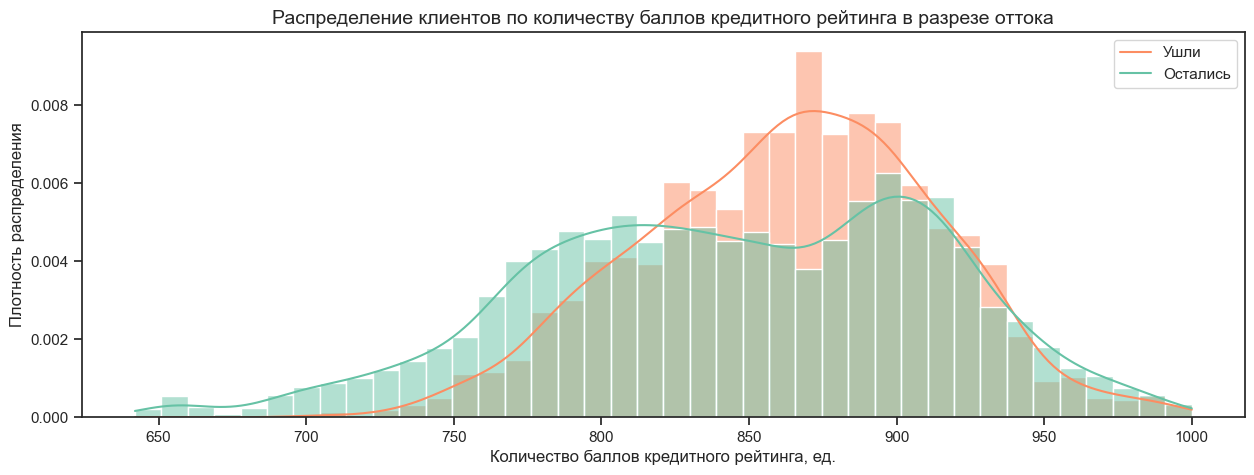

In [63]:
# вызываем функцию, выводим график распределения клиентов по количеству баллов кредитного рейтинга в разрезе оттока
continuous_values_graph(df, 'score')

На графике видим пик оттока среди клиентов с кредитным рейтингом примерно между 850 и 900 баллов.

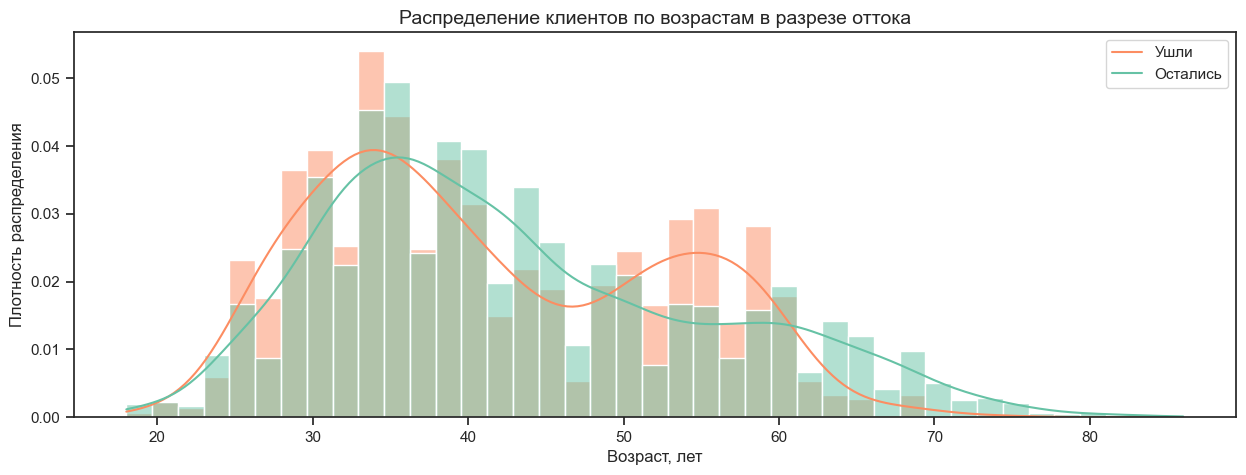

In [64]:
# вызываем функцию, выводим график распределения клиентов по возрасту в разрезе оттока
continuous_values_graph(df, 'age')

На графике видим два пика оттока среди клиентов. Более заметный для клиентов возрастом около 35 лет, менее заметный — около 55 лет.

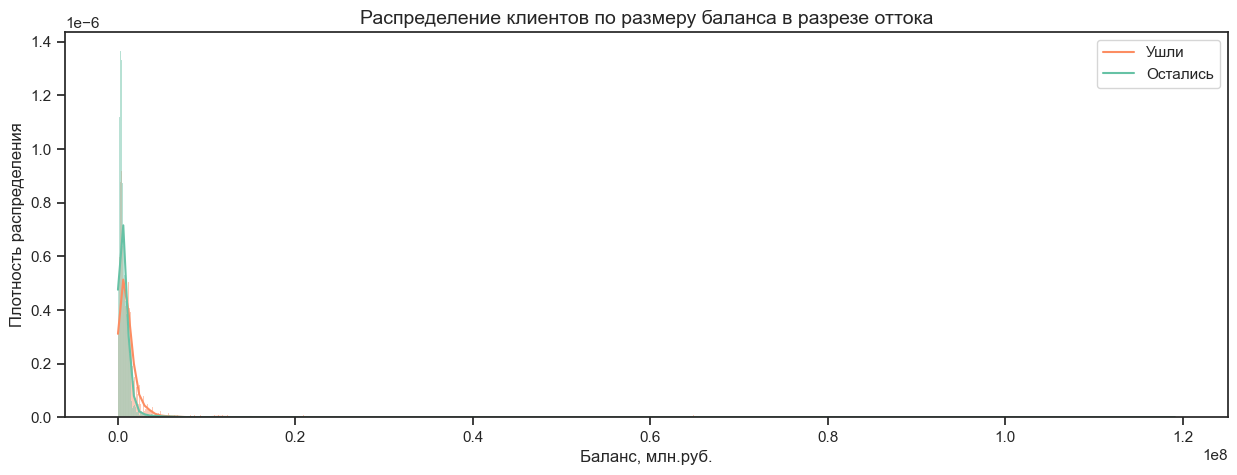

In [65]:
# вызываем функцию, выводим график распределения клиентов по размеру баланса в разрезе оттока
continuous_values_graph(df, 'balance')

На этапе проверки количественных значений мы отмечали наличие выбросов в столбце `balance` в количестве 427 шт. Для корректного вывода отфильтруем выбросы, иначе весь график окажется неинформативен из-за зажатости в левый угол в силу наличия выбросов.

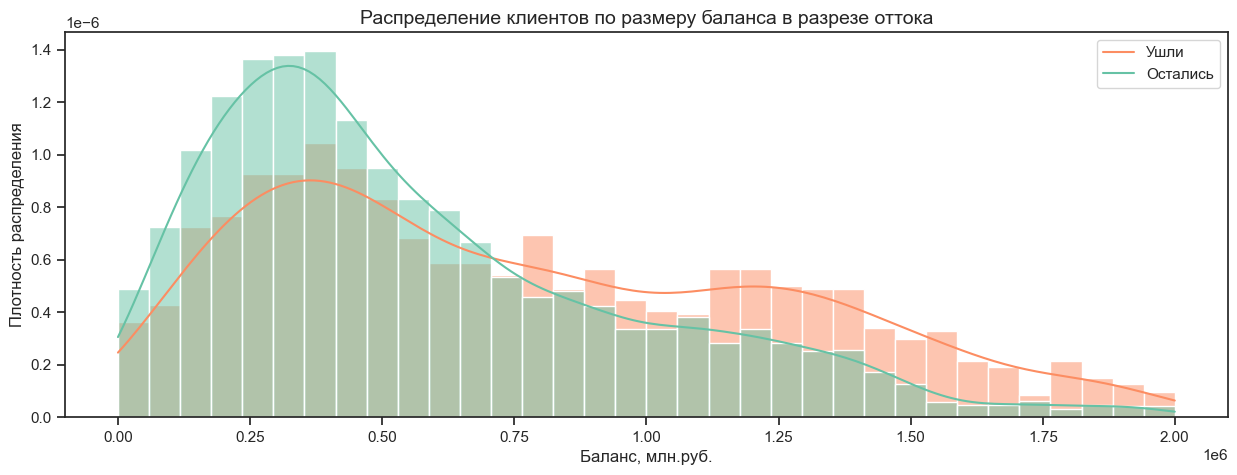

In [66]:
# вызываем функцию, выводим график распределения клиентов по размеру баланса без выбросов в разрезе оттока 
continuous_values_graph(not_outliers(df, 'balance'), 'balance')

На графике видим пик оттока среди клиентов с балансом между 0.25 и 0.5 млн.руб.

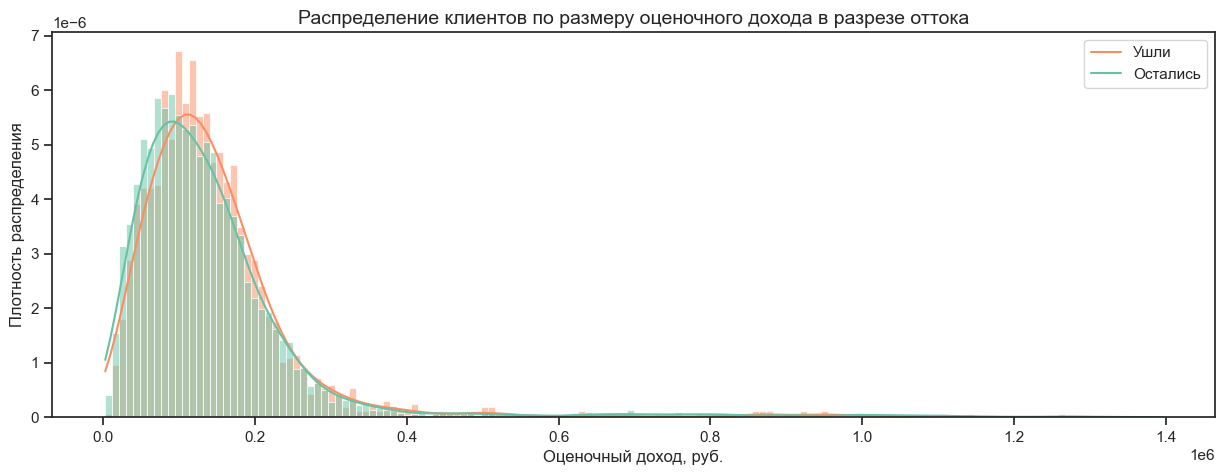

In [67]:
# вызываем функцию, выводим график распределения клиентов по размеру оценочного дохода в разрезе оттока
continuous_values_graph(df, 'est_salary')

На этапе проверки количественных значений мы отмечали наличие выбросов в столбце `est_salary` в количестве 479 шт. Для корректного вывода отфильтруем выбросы, иначе весь график окажется неинформативен из-за зажатости в левый угол в силу наличия выбросов.

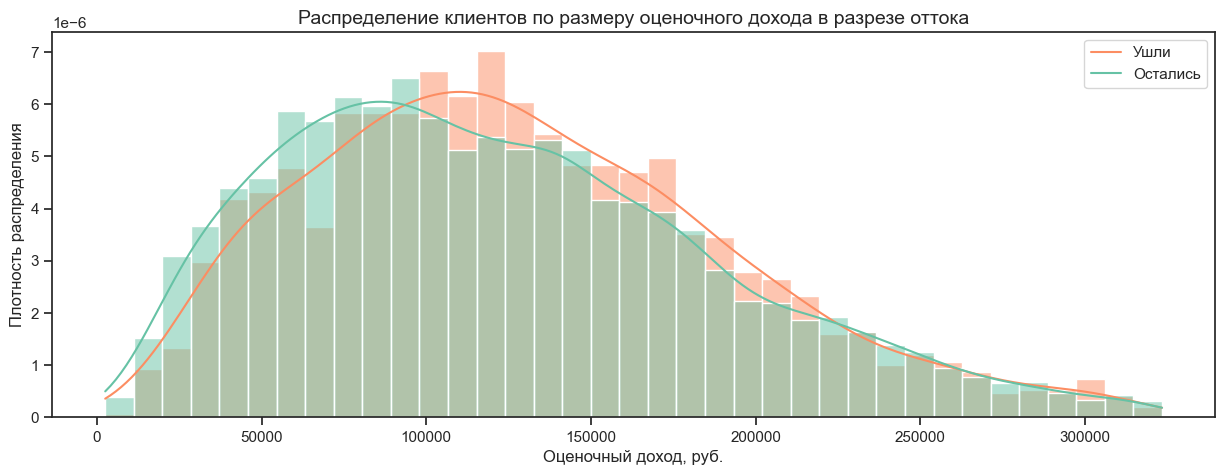

In [68]:
# вызываем функцию, выводим график распределения клиентов по размеру оценочного дохода без выбросов в разрезе оттока
continuous_values_graph(not_outliers(df, 'est_salary'), 'est_salary')

На графике видим пик оттока среди клиентов с оценочным доходом около 100000 руб.

### Распределение оттока клиентов по дискретным признакам

In [69]:
# создаём функцию вывода графиков по дискретным и категориальным признакам
def discrete_values_graph(df, column):
    df_graph=(
        df
        .groupby(column)['churn']
        .agg(['count', 'sum'])
        .reset_index()
        .assign(sum=lambda x: (x['sum'] / x['count'] * 100).round(2))
        .rename(columns={'sum': 'ratio'})
    )
    
    fig, ax = plt.subplots(nrows=1, ncols=2)

    sns.countplot(
        data=df.sort_values(by=column),
        x=column,
        hue='churn',
        ax=ax[0]
    )
    ax[0].set_title(columns_dict[column][1], fontsize=14)
    ax[0].set_xlabel(columns_dict[column][3], fontsize=14)
    ax[0].set_ylabel('Количество клиентов, чел.', fontsize=14)
    ax[0].legend(['Остались', 'Ушли'])
    for container in ax[0].containers:
        ax[0].bar_label(container, size=11)
    
    sns.barplot(
        data=df_graph,
        x=column,
        y='ratio',
        color='LightSkyBlue',
        ax=ax[1]
    )
    ax[1].set_title(columns_dict[column][2], fontsize=14)
    ax[1].set_xlabel(columns_dict[column][3], fontsize=14)
    ax[1].set_ylabel('Доля оттока клиентов, %', fontsize=14)
    ax[1].axhline(
        df['churn'].mean() * 100,
        linestyle='--',
        color='black',
        label='Средний отток по банку'
    )
    ax[1].legend(labelcolor='linecolor')
    for container in ax[1].containers:
        ax[1].bar_label(container, size=11, fmt='%.2f%%')

    fig.suptitle(columns_dict[column][0], fontsize=18)
    plt.tight_layout()
    plt.show()

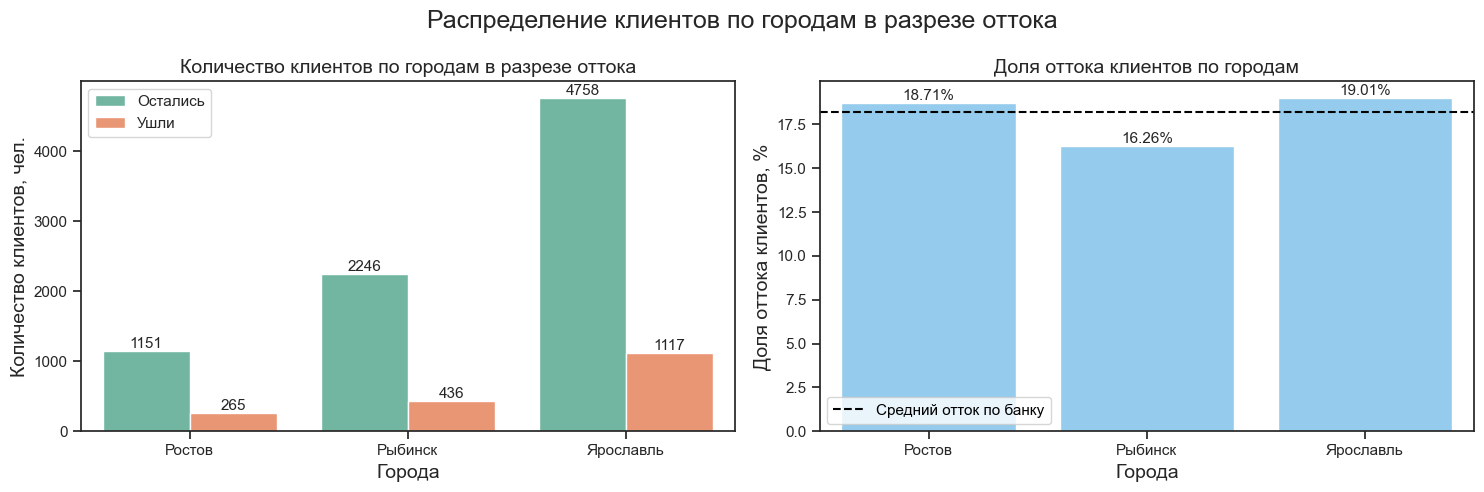

In [70]:
# вызываем функцию, выводим график распределения клиентов по городам в разрезе оттока
discrete_values_graph(df, 'city')

Наименьшее количество клиентов в Ростове и там тоже высока доля отточных клиентов, превышающая средний отток клиентов по банку.  
Наибольшее количество клиентов ожидаемо в Ярославле, там же самая высокая доля отточных клиентов, превышающая средний отток клиентов по банку.  
Наименьшая доля отточных клиентов в Рыбинске (ниже среднего оттока клиентов по банку) при среднем количестве клиентов.

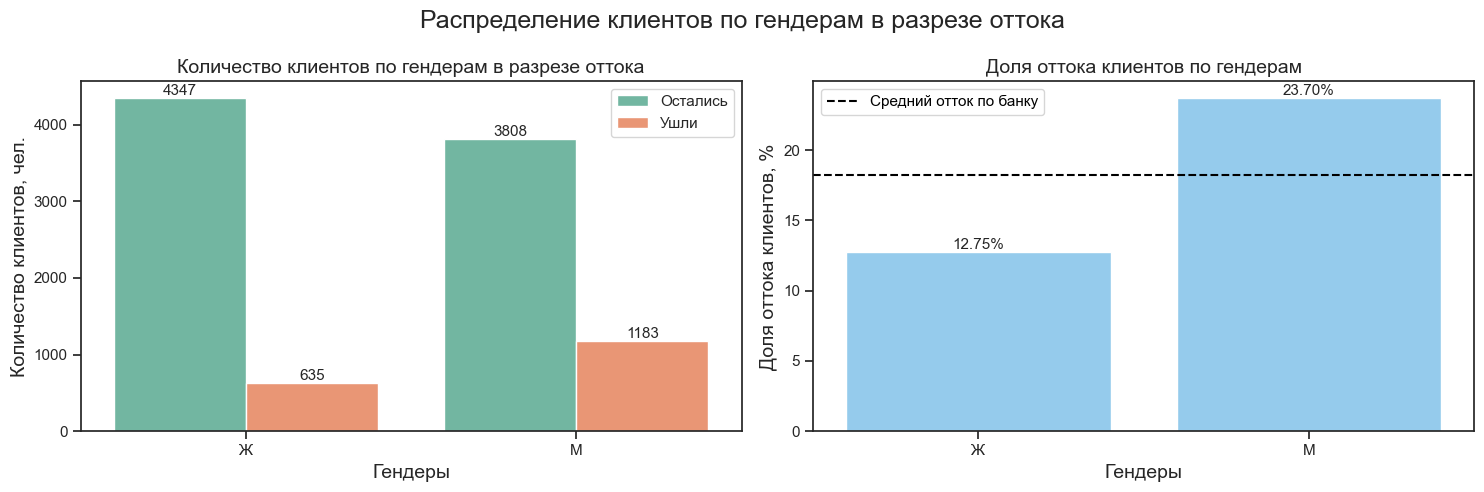

In [71]:
# вызываем функцию, выводим график распределения клиентов по гендерам в разрезе оттока
discrete_values_graph(df, 'gender')

Женщин клиентов больше, но они более верные клиенты, нежели мужчины — отток в два раза меньше.

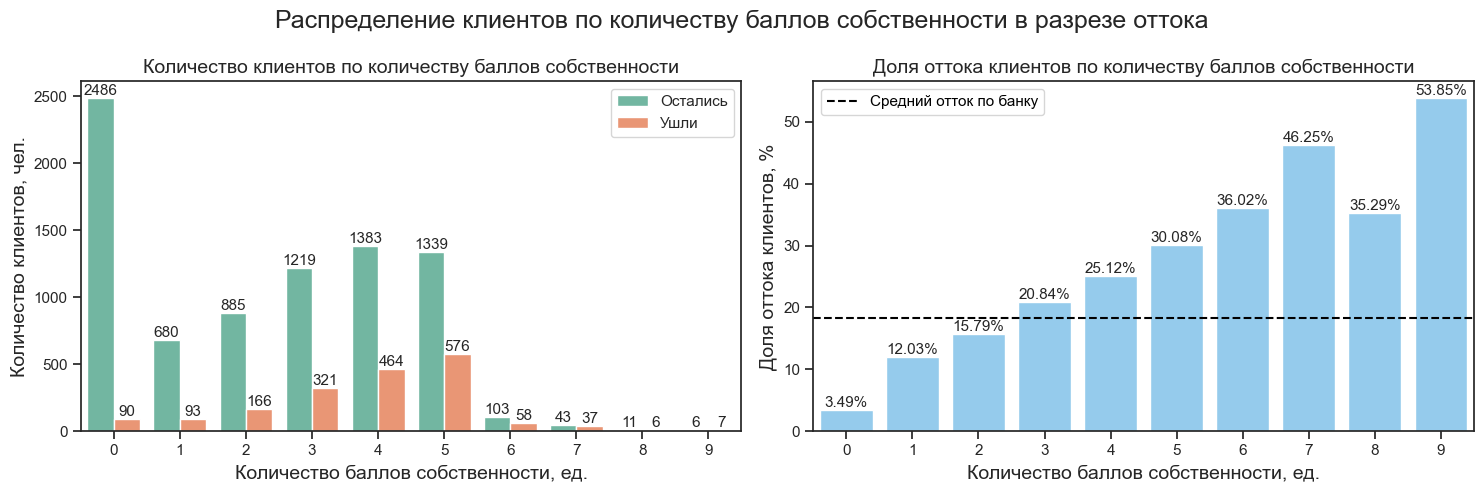

In [72]:
# вызываем функцию, выводим график распределения клиентов по количеству баллов собственности в разрезе оттока
discrete_values_graph(df, 'equity')

С подавляющим преимуществом лидируют клиенты без собственности и среди них же практически нет оттока (бюджетники?). Более 5 баллов набирают единицы, но от них толку немного — чуть ли не каждый второй предатель (отток выше среднего по банку). В целом же наблюдается тенденция: больше баллов — больше процент оттока.

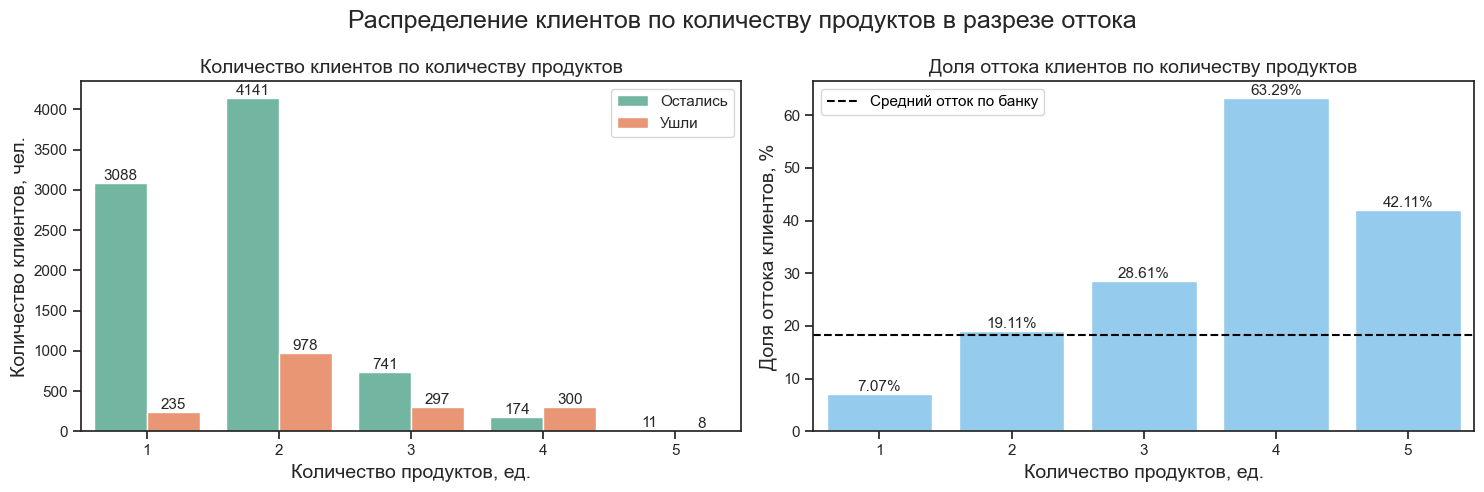

In [73]:
# вызываем функцию, выводим график распределения клиентов по количеству продуктов в разрезе оттока
discrete_values_graph(df, 'products')

Значимые группы — клиенты с одним или двумя продуктами банка, остальные ощутимо меньше, но опять же от них мало толку — попробовав максимальное количество банковских продуктов клиенты начинают разбегаться (отток выше среднего по банку).

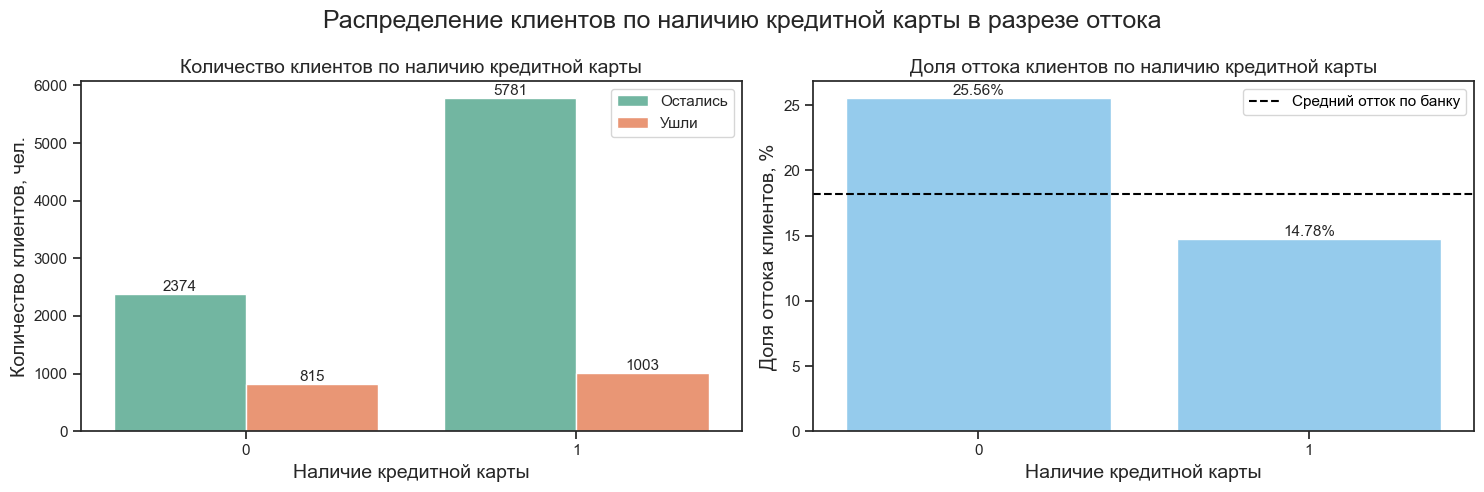

In [74]:
# вызываем функцию, выводим график распределения клиентов по наличию кредитной карты в разрезе оттока
discrete_values_graph(df, 'credit_card')

Большая часть клиентов имеет кредитные карты и среди них отток ниже чем в среднем по банку. А свободные от кредитных карт более непостоянны — каждый четвёртый клиент сбегает (отток выше среднего по банку).

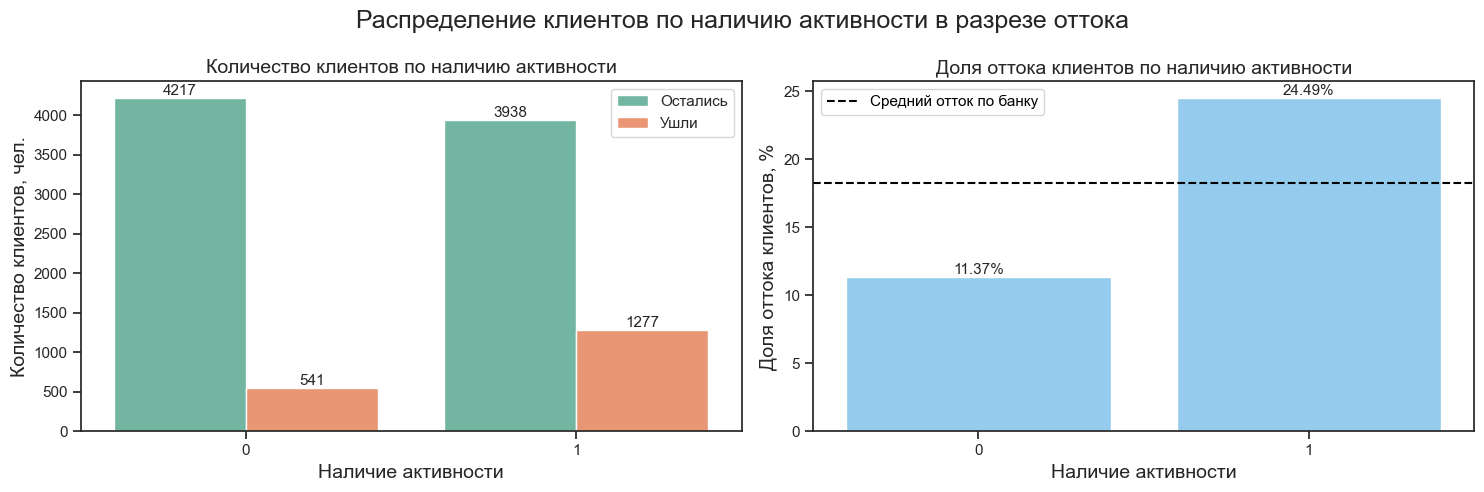

In [75]:
# вызываем функцию, выводим график распределения клиентов по наличию активности в разрезе оттока
discrete_values_graph(df, 'last_activity')

Пассивных и активных клиентов примерно поровну, но первые менее подвержены оттоку (меньше среднего по банку), нежели вторые (отток выше среднего по банку).

## Анализ портретов клиентов в разрезе оттока

In [76]:
# создаём вспомогательный словарь для переименования признаков и мер
feature_dict ={
    'feature': [
        'Возраст: среднее значение',
        'Возраст: медианное значение',
        'Баланс: среднее значение',
        'Баланс: медианное значение',
        'Наличие кредитной карты: медианное значение',
        'Количество баллов собственности: медианное значение',
        'Оценочный доход: среднее значение',
        'Оценочный доход: медианное значение',
        'Активность: медианное значение',
        'Количество банковских продуктов: медианное значение',
        'Количество баллов кредитного скоринга: среднее значение',
        'Количество баллов кредитного скоринга: медианное значение',
        'Город',
        'Гендер'
    ]
}

In [77]:
# создаём промежуточный датафрейм с признаками и мерами по количественным признакам
df_portrait_1 = df.pivot_table(
    values=df.select_dtypes(exclude=['object']).columns[1:-1],
    index='churn',
    aggfunc={
        'score': ['mean', 'median'],
        'age': ['mean', 'median'],
        'equity': 'median',
        'balance': ['mean', 'median'],
        'products': 'median',
        'credit_card': 'median',
        'last_activity': 'median',
        'est_salary': ['mean', 'median']
    }
).T

# добавляем столбец с расчётом относительной разницы
df_portrait_1['difference'] = (df_portrait_1[1] / df_portrait_1[0] - 1).map('{:.2%}'.format)

# создаём промежуточный датафрейм с признаками и мерами по категориальным признакам
df_portrait_2 = df.pivot_table(
    values=df.select_dtypes(include=['object']).columns,
    index='churn',
    aggfunc={
        'city': lambda x: x.mode(),
        'gender': lambda x: x.mode()
    }
).T

# объединяем промежуточные датафреймы
df_portrait = pd.concat([df_portrait_1, df_portrait_2]).fillna('Не рассчитывается')

# переименовываем индекс
df_portrait.index.names = ['Признак: мера']

# переименовываем столбцы
df_portrait.columns = ['Остались', 'Ушли', 'Относительная разница']

# переименовываем признаки и меры
for index, feature in enumerate(df_portrait.index.tolist()):
    df_portrait.rename({feature: feature_dict['feature'][index]}, inplace=True)

# убраем признаки и меры из индекса
df_portrait = df_portrait.reset_index()

# выводим итоговую таблицу признаков и мер
df_portrait

,Признак: мера,Остались,Ушли,Относительная разница
0,Возраст: среднее значение,43.02,41.43,-3.70%
1,Возраст: медианное значение,40.00,39.00,-2.50%
2,Баланс: среднее значение,733031.63,1134458.21,54.76%
3,Баланс: медианное значение,475410.09,783908.90,64.89%
4,Наличие кредитной карты: медианное значение,1.00,1.00,0.00%
5,Количество баллов собственности: медианное значение,3.00,4.00,33.33%
6,Оценочный доход: среднее значение,147674.64,148357.48,0.46%
7,Оценочный доход: медианное значение,118227.60,125408.88,6.07%
8,Активность: медианное значение,0.00,1.00,inf%
9,Количество банковских продуктов: медианное значение,2.00,2.00,0.00%


**Портрет оставшегося клиента:** женщина из ярославского отделения, в возрасте 40-43 года, хорошо зарабатывающая, имеющая недвижимость  и хранящая в банке средние суммы, с хорошим баллом кредитного скоринга, имеющая кредитную карту и пользующаяся двумя банковскими продуктами, но не проявляющая активность.

**Портрет ушедшего клиента:** мужчина из ярославского отделения, в возрасте 39-40 лет, много зарабатывающий, имеющий недвижимость и хранящий в банке большие суммы (в 1,5-2 раза больше, чем оставшиеся клиенты), с хорошим баллом кредитного скоринга, имеющий кредитную карту и пользующийся двумя банковскими продуктами и проявляющий активность.

## Корреляционный анализ оттока с другими признаками

Для определения корреляции воспользуемся методом `phik_matrix`, где в `interval_cols` включим следующие столбцы: `score`, `age`, `balance`, `est_salary`.

In [78]:
# выводим матрицу корреляции признаков
(
    df
    .drop(['user_id'], axis=1)
    .phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])
)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,0.09,0.07,0.03,0.53,0.17,0.42,0.21,0.05,0.40,0.23
city,0.09,1.00,0.01,0.09,0.06,0.04,0.13,0.07,0.03,0.17,0.02
gender,0.07,0.01,1.00,0.29,0.06,0.05,0.07,0.20,0.01,0.14,0.22
age,0.03,0.09,0.29,1.00,0.05,0.02,0.14,0.16,0.09,0.36,0.19
equity,0.53,0.06,0.06,0.05,1.00,0.00,0.58,0.22,0.05,0.29,0.35
balance,0.17,0.04,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02
products,0.42,0.13,0.07,0.14,0.58,0.00,1.00,0.27,0.11,0.22,0.26
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.27,1.00,0.05,0.04,0.20
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.04,0.26
est_salary,0.40,0.17,0.14,0.36,0.29,0.37,0.22,0.04,0.04,1.00,0.05


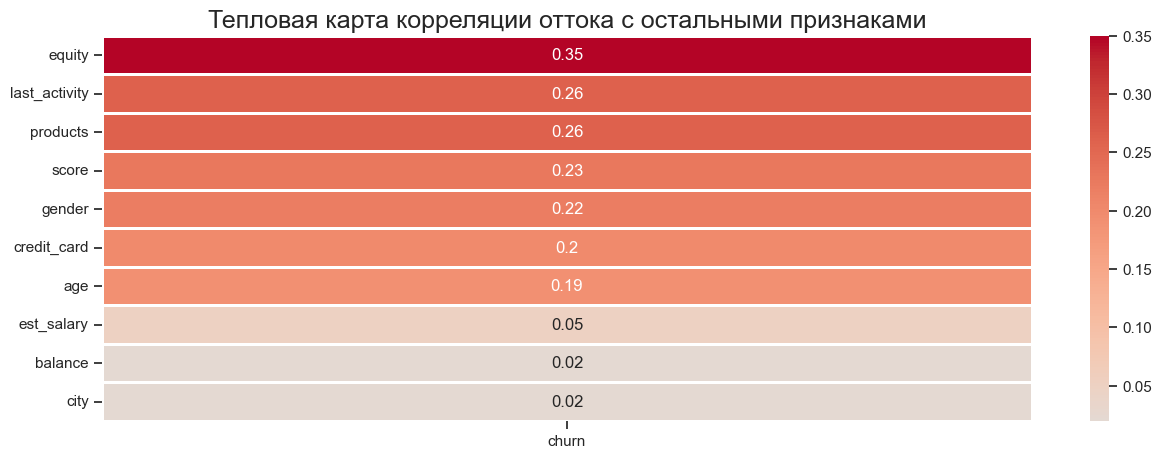

In [79]:
# выводим тепловую карту корреляции признаков
sns.heatmap(
    (
        df
        .phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])
        .sort_values(by='churn', ascending=False)
        .drop(['churn', 'user_id'])
        .round(2)
        [['churn']])
    ,
    annot=True,
    center=0,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white'
)
plt.title('Тепловая карта корреляции оттока с остальными признаками', fontsize=18)
plt.show()

Шкала Чеддока используется для оценки силы связи коэффициентов корреляции. Градации шкалы:
- от 0,0 до 0,3 — очень слабая
- от 0,3 до 0,5 — слабая
- от 0,5 до 0,7 — средняя
- от 0,7 до 0,9 — сильная
- от 0,9 до 1,0 — очень сильная

Судя по шкале Чеддока, у признака `churn` слабая положительная связь с признаком `equity`, очень слабая положительная с `last_activity`, `products`, `score`, `gender`, `credit_card`, `age` и отсутствует с `est_salary`, `balance` и `city`.

# Проверка статистических гипотез

Как мы ранее выявили в результатет корреляционного анализа, y признака `churn` отсутствует связь с `est_salary`, но таково пожелание заказчика, поэтому сначала мы проверим гипотезу о равенстве доходов оставшихся и ушедших клиентов.  
Далее проверим гипотезу о равенстве количества баллов собственности оставшихся и ушедших клиентов, т.к. наибольшая связь оттока выявлена именно с признаком `equity`.

Для проверки статистических гипотез удобно и целесообразно проведение t-теста Стьюдента, если соблюдены следующие условия:
- Условие 1: Выборки независимы между собой;
- Условие 2: В выборках отсутствуют выбросы;
- Условие 3: Выборочные средние нормально распределены;
- Условие 4: Дисперсии выборок равны.

## Гипотеза №1: Средние доходы оставшихся и ушедших клиентов равны

**Проверим условия применимости проведения t-теста Стьюдента**

**Условие 1:** наши сравниваемые выборки независимы друг от друга, т.к. мы сравниваем разных людей: оставшихся и ушедших клиентов.

**Условие 2:** в выборках есть небольшое количество выбросов, которые мы отмечали на этапе проверки количественных значений. Соответственно, все расчёты проведём на выборке без выбросов, чтобы соблюсти условие применимости проведения t-теста Стьюдента.

**Условие 3:** Считаем распределение выборочных средних нормальным в силу центральной предельной теоремы — если в выборке достаточно наблюдений, выборочное среднее распределено близко к нормальному. Для получения среднего мы складываем отдельные наблюдения, и все они случайным образом берутся из одной и той же генеральной совокупности, то есть имеют одинаковое распределение. При этом почти нет ограничений на распределение самих складываемых случайных величин. То есть генеральная совокупность может быть распределена как угодно: датасет из средних значений всех возможных выборок всё равно будет близко к нормальному распределён вокруг среднего всей совокупности.  Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально. Часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста Стьюдента это необязательно.  
Тем не менее, проведём проверку нормальности распределения данных при помощи критерия Шапиро-Уилка. Он нужен, чтобы оценить нормальность распределения с помощью статистического показателя, а не графика.

**Выборка по оставшимся клиентам**  
H0: Распределение нормально для оставшихся клиентов.  
H1: распределение не нормально для оставшихся клиентов.

**Выборка по ушедшим клиентам**  
H0: Распределение нормально для ушедших клиентов.  
H1: распределение не нормально для ушедших клиентов.

In [80]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значения p-value для оставшихся и ушедших клиентов
p_value_0 = round(st.shapiro(not_outliers(df, 'est_salary').query('churn == 0')['est_salary'])[1], 2)
p_value_1 = round(st.shapiro(not_outliers(df, 'est_salary').query('churn == 1')['est_salary'])[1], 2)

print('p-значение для оставшихся клиентов:', p_value_0)
if p_value_0 < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально для оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение нормально для оставшихся клиентов')

print()

print('p-значение для оставшихся клиентов:', p_value_1)
if p_value_1 < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально для ушедших клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение нормально для ушедших клиентов')

p-значение для оставшихся клиентов: 0.0
Отвергаем нулевую гипотезу: распределение не нормально для оставшихся клиентов

p-значение для оставшихся клиентов: 0.0
Отвергаем нулевую гипотезу: распределение не нормально для ушедших клиентов


**Условие 4:** Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то можно считать их дисперсии равными. Если же выборки разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, при проведении t-теста Стьюдента дисперсии выборок считаются по отдельности.  
Иногда предварительно проверяют равенство дисперсий специальными тестами, например, тестом Левене. Но и он может привести к неверному выводу.  
Тем не менее, проведём его ради эксперимента. Статистический тест проверяет нулевую гипотезу о том, что дисперсии в двух выборках не имеют значимых различий. Если результирующее p-значение критерия Левене меньше некоторого уровня значимости (например, 0,05), полученные различия в выборочных отклонениях вряд ли имели место на основе случайной выборки из генеральной совокупности с равными отклонениями. Таким образом, нулевая гипотеза о равных дисперсиях отвергается, и делается вывод о том, что существует разница между дисперсиями в совокупности.

In [81]:
# выводим значения дисперсий по выборкам
print(f"Дисперсия по выборке оставшихся клиентов: {not_outliers(df, 'est_salary').query('churn == 0')['est_salary'].var().round(2)}")
print(f"Дисперсия по выборке ушедших клиентов: {not_outliers(df, 'est_salary').query('churn == 1')['est_salary'].var().round(2)}")

Дисперсия по выборке оставшихся клиентов: 4289913652.6
Дисперсия по выборке ушедших клиентов: 3947177452.41


In [82]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значение p-value
p_value = st.levene(
    not_outliers(df, 'est_salary').query('churn == 0')['est_salary'],
    not_outliers(df, 'est_salary').query('churn == 1')['est_salary']
)[1].round(2)

print('p-значение:', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу:  дисперсии в выборках имеют значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу: дисперсии в выборках не имеют значимых различий')

p-значение: 0.01
Отвергаем нулевую гипотезу:  дисперсии в выборках имеют значимые различия


Как мы знаем, t-тест Стьюдента более интерпретируемый и понятный для бизнеса. В нашем исследовании можно использовать t-критерий Уэлча. Это статистический тест, основанный на распределении Стьюдента и предназначенный для проверки статистической гипотезы о равенстве математических ожиданий случайных величин, имеющих необязательно равные известные дисперсии.

**Сформулируем гипотезы:**  
**H0: Доходы оставшихся и ушедших клиентов равны.**  
**H1: Доходы оставшихся и ушедших клиентов не равны.**

In [83]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значение p-value
p_value = st.ttest_ind(
    not_outliers(df, 'est_salary').query('churn == 0')['est_salary'],
    not_outliers(df, 'est_salary').query('churn == 1')['est_salary'],
    equal_var=False
)[1].round(2)

print('p-значение:', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: доходы оставшихся и ушедших клиентов не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: доходы оставшихся и ушедших клиентов равны')

p-значение: 0.0
Отвергаем нулевую гипотезу: доходы оставшихся и ушедших клиентов не равны


**Таким образом, считаем, что средние доходы оставшихся и ушедших клиентов имеют статистическую разницу.**

## Гипотеза №2. Среднее количество баллов собственности оставшихся и ушедших клиентов равно

**Проверим условия применимости проведения t-теста Стьюдента**

**Условие 1:** наши сравниваемые выборки независимы друг от друга, т.к. мы сравниваем разных людей: оставшихся и ушедших клиентов.

**Условие 2:** в выборках отсутствуют выбросы.

**Условие 3:** Считаем распределение выборочных средних нормальным в силу центральной предельной теоремы — если в выборке достаточно наблюдений, выборочное среднее распределено близко к нормальному. Для получения среднего мы складываем отдельные наблюдения, и все они случайным образом берутся из одной и той же генеральной совокупности, то есть имеют одинаковое распределение. При этом почти нет ограничений на распределение самих складываемых случайных величин. То есть генеральная совокупность может быть распределена как угодно: датасет из средних значений всех возможных выборок всё равно будет близко к нормальному распределён вокруг среднего всей совокупности.  Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально. Часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста Стьюдента это необязательно.  
Тем не менее, проведём проверку нормальности распределения данных при помощи критерия Шапиро-Уилка. Он нужен, чтобы оценить нормальность распределения с помощью статистического показателя, а не графика.

**Выборка по оставшимся клиентам**  
H0: Распределение нормально для оставшихся клиентов.  
H1: распределение не нормально для оставшихся клиентов.

**Выборка по ушедшим клиентам**  
H0: Распределение нормально для ушедших клиентов.  
H1: распределение не нормально для ушедших клиентов.

In [84]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значения p-value для оставшихся и ушедших клиентов
p_value_0 = round(st.shapiro(df.query('churn == 0')['equity'])[1], 2)
p_value_1 = round(st.shapiro(df.query('churn == 1')['equity'])[1], 2)

print('p-значение для оставшихся клиентов:', p_value_0)
if p_value_0 < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально для оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение нормально для оставшихся клиентов')

print()

print('p-значение для оставшихся клиентов:', p_value_1)
if p_value_1 < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально для ушедших клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение нормально для ушедших клиентов')

p-значение для оставшихся клиентов: 0.0
Отвергаем нулевую гипотезу: распределение не нормально для оставшихся клиентов

p-значение для оставшихся клиентов: 0.0
Отвергаем нулевую гипотезу: распределение не нормально для ушедших клиентов


**Условие 4:** Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то можно считать их дисперсии равными. Если же выборки разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, при проведении t-теста Стьюдента дисперсии выборок считаются по отдельности.  
Иногда предварительно проверяют равенство дисперсий специальными тестами, например, тестом Левене. Но и он может привести к неверному выводу.  
Тем не менее, проведём его ради эксперимента. Статистический тест проверяет нулевую гипотезу о том, что дисперсии в двух выборках не имеют значимых различий. Если результирующее p-значение критерия Левене меньше некоторого уровня значимости (например, 0,05), полученные различия в выборочных отклонениях вряд ли имели место на основе случайной выборки из генеральной совокупности с равными отклонениями. Таким образом, нулевая гипотеза о равных дисперсиях отвергается, и делается вывод о том, что существует разница между дисперсиями в совокупности.

In [85]:
# выводим значения дисперсий по выборкам
print(f"Дисперсия по выборке оставшихся клиентов: {df.query('churn == 0')['equity'].var().round(2)}")
print(f"Дисперсия по выборке ушедших клиентов: {df.query('churn == 1')['equity'].var().round(2)}")

Дисперсия по выборке оставшихся клиентов: 3.88
Дисперсия по выборке ушедших клиентов: 2.52


In [86]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значение p-value
p_value = st.levene(
    df.query('churn == 0')['equity'],
    df.query('churn == 1')['equity']
)[1].round(2)

print('p-значение:', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу:  дисперсии в выборках имеют значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу: дисперсии в выборках не имеют значимых различий')

p-значение: 0.0
Отвергаем нулевую гипотезу:  дисперсии в выборках имеют значимые различия


Как мы знаем, t-тест Стьюдента более интерпретируемый и понятный для бизнеса. В нашем исследовании можно использовать t-критерий Уэлча. Это статистический тест, основанный на распределении Стьюдента и предназначенный для проверки статистической гипотезы о равенстве математических ожиданий случайных величин, имеющих необязательно равные известные дисперсии.

**Сформулируем гипотезы:**  
**H0: Количество баллов собственности оставшихся и ушедших клиентов равно.**  
**H1: Количество баллов собственности оставшихся и ушедших клиентов не равно.**

In [87]:
# задаём критический уровень статистической значимости
alpha = 0.05

# считаем значение p-value
p_value = st.ttest_ind(
    df.query('churn == 0')['equity'],
    df.query('churn == 1')['equity'],
    equal_var=False
)[1].round(2)

print('p-значение:', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: количество баллов собственности оставшихся и ушедших клиентов не равно')
else:
    print('Не получилось отвергнуть нулевую гипотезу: количество баллов собственности оставшихся и ушедших клиентов равно')

p-значение: 0.0
Отвергаем нулевую гипотезу: количество баллов собственности оставшихся и ушедших клиентов не равно


**Таким образом, считаем, что среднее количество баллов собственности оставшихся и ушедших клиентов имеет статистическую разницу.**

# Выводы исследования

## Выводы по результатам исследовательского анализа

Исследовательский анализ был проведён отдельно для непрерывных и дискретных/категориальных признаков.

**Анализ неперерывных признаков** был нацелен на определение интервалов повышенного оттока клиентов.  
`score` — отмечен пик оттока среди клиентов с кредитным рейтингом примерно между 850 и 900 баллов.  
`age` — заметны два пика оттока: более заметный для клиентов возрастом около 35 лет, менее заметный — около 55 лет.  
`balance` — выявлен пик оттока среди клиентов с балансом между 0.25 и 0.5 млн.руб.  
`est_salary` — отмечен пик оттока среди клиентов с оценочным доходом около 100000 руб.

**Анализ дискретных/категориальных признаков** был направлен на выявление значений, при которых наблюдается повышенный отток клиентов.  
`city` — наибольшее количество клиентов обслуживается в Ярославле, там же самая высокая доля отточных клиентов.  
`gender` — женщин клиентов больше, но они более верные клиенты, нежели мужчины — отток в два раза меньше.  
`equity` — c подавляющим преимуществом лидируют клиенты без собственности и среди них же практически нет оттока, а в целом наблюдается тенденция: чем больше баллов, чем больше процент оттока.  
`products` — наибольшее количество клиентов используют один или два продукта банка, остальные ощутимо меньше, но у них повышенный отток.  
`credit_card` — большинство клиентов имеет кредитные карты и среди них отток пониженный отток, а отсутствие кредитной карты приводит к повышенному оттоку.  
`last_activity` — пассивных и активных клиентов примерно поровну, но первые менее подвержены оттоку, вторые более.

**Портрет оставшегося клиента:** женщина из ярославского отделения, в возрасте 40-43 года, хорошо зарабатывающая, имеющая недвижимость  и хранящая в банке средние суммы, с хорошим баллом кредитного скоринга, имеющая кредитную карту и пользующаяся двумя банковскими продуктами, но не проявляющая активность.

**Портрет ушедшего клиента:** мужчина из ярославского отделения, в возрасте 39-40 лет, много зарабатывающий, имеющий недвижимость и хранящий в банке большие суммы (в 1,5-2 раза больше, чем оставшиеся клиенты), с хорошим баллом кредитного скоринга, имеющий кредитную карту и пользующийся двумя банковскими продуктами и проявляющий активность.

## Выводы по результатам корреляционного  анализа

Для определения корреляции мы воспользовались методом `phik_matrix`, получив следующие результаты: отток слабо положительно связан с признаком `equity`, очень слабо положительно с `last_activity`, `products`, `score`, `gender`, `credit_card`, `age` и никак не связан с `est_salary`, `balance` и `city`.

## Выводы по результатам проверки статистических гипотез

Были проверены две статистические гипотезы:

Гипотеза № 1: Средние доходы оставшихся и ушедших клиентов равны  
Гипотеза № 2: Среднее количество баллов собственности оставшихся и ушедших клиентов равно

Проверку обеих гипотез мы провели с помощью t-теста Стьюдента. Наш выбор был обусловлен лучшей интерпретируемостью его результатов для бизнеса. Предварительно мы удостоверились в выполнении условий для его проведения.

Гипотеза № 1 была отвергнута, т.к. средние доходы оставшихся и ушедших клиентов имеют статистическую разницу.  
Гипотеза № 2 была отвергнута, т.к. среднее количество баллов собственности оставшихся и ушедших клиентов имеет статистическую разницу.

Как мы уже выяснили, у признака `churn` слабая положительная связь с признаком `equity`, очень слабая положительная с `last_activity`, `products`, `score`, `gender`, `credit_card`, `age` и отсутствует с `est_salary`, `balance` и `city`.

Таким образом, выделение сегментов возможно по указанным признакам в рамках следующих ограничений:
- `age` — два диапазона значений: молодёжь 25-35 лет и предпенсионеры 50-60 лет
- `balance` — рассматриваем все значения
- `city` — рассматриваем все значения
- `credit_card` — клиенты без кредитных карт
- `equity` — более 2 баллов
- `est_salary` — рассматриваем все значения
- `gender` — мужчины
- `last_activity` — активные клиенты
- `products` — более 1 продукта
- `score` — диапазон значений 850-900 баллов

# Сегментация клиентов

По полученному от заказчика ТЗ, предложенный нами сегмент должен соответствовать следующим условиям:
- количество сегментов должно быть не менее 3;
- количество клиентов в сегменте должно быть не менее 500;
- отток клиентов сегмента должен быть выше, чем в среднем по банку.

In [88]:
# выводим признаки, на основе которых мы будем реализовывать сегментацию клиентов банка,
# а также долю оттока и количество клиентов с учётом ранее выявленных интервалов и значений повышенного оттока клиентов
(
    pd.DataFrame(
        {
            'age': df.query('25 <= age <= 35 or 50 <= age <= 60')['churn'].agg(['mean', 'count']),
            'credit_card': df.query('credit_card == 0')['churn'].agg(['mean', 'count']),
            'equity': df.query('equity > 2')['churn'].agg(['mean', 'count']),
            'gender': df.query('gender == "М"')['churn'].agg(['mean', 'count']),
            'last_activity': df.query('last_activity == 1')['churn'].agg(['mean', 'count']),
            'products': df.query('products > 1')['churn'].agg(['mean', 'count']),
            'score': df.query('850 <= score <= 900')['churn'].agg(['mean', 'count']),
            'Средний уровень оттока по банку': df['churn'].agg(['mean', 'count'])
        }
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .rename(
        columns={
            'index': 'Признаки сегментации',
            'mean': 'Доля оттока, %',
            'count': 'Количество клиентов, чел.'
        }
    )
)

,Признаки сегментации,"Доля оттока, %","Количество клиентов, чел."
0,age,23.49,4823.00
1,credit_card,25.56,3189.00
2,equity,26.36,5573.00
3,gender,23.70,4991.00
4,last_activity,24.49,5215.00
5,products,23.80,6650.00
6,score,26.46,2729.00
7,Средний уровень оттока по банку,18.23,9973.00


В поисках оптимального сегментирования нам предстоит пройти между Сциллой (пересегментирование) и Харибдой (недосегментирование).

Сцилла — выделение большого количества сегментирующих признаков и, как результат, избыточное сегментирование. Следствие — сегменты получаются слишком узкими, проблематично охватить много клиентов в пределах сегмента, и это повышает риск того, что мероприятия по удержанию клиентов не окажутся эффективными.

Харибда — выделение малого количества сегментирующих признаков и, как результат, недостаточное сегментирование. Следствие — сегменты получаются слишком широкими, проблематично подобрать рекомендации, и это повышает риск того, что мы не сможем никого удержать.

## Сегментация клиентов на основе всех признаков коррелирующих с оттоком

Ранее мы определили, что для сегментации клиентов мы будем анализировать следующие признаки (с учётом ранее выявленных интервалов и значений повышенного оттока клиентов):
- бинарные: `last_activity`, `gender`, `credit_card`;
- небинарные: `score`, `age`, `equity`, `products`.

Сначала предпримем попытку охватить все признаки сегментирования. Для дальнейшего анализа проведём обработку небинарных признаков на предмет их **"бинаризации"** по следующей логике: выполнение условие равно 1, обратное равно 0. Далее проведём перебор перестановок признаков и отфильтруем их по условиям сегментирования.

In [89]:
# создаём копию
df_all_features = df.copy(deep=True)

# бинарим признаки
df_all_features['gender'] = df_all_features['gender'].apply(lambda x: 1 if x=='М' else 0)
df_all_features['equity'] = df_all_features['equity'].apply(lambda x: 1 if x>2 else 0)
df_all_features['products'] = df_all_features['products'].apply(lambda x: 1 if x>1 else 0)
df_all_features['score'] = df_all_features['score'].apply(lambda x: 1 if 850<x<900 else 0)
df_all_features['age_young'] = df_all_features['age'].apply(lambda x: 1 if 25<x<35 else 0)
df_all_features['age'] = df_all_features['age'].apply(lambda x: 1 if 50<x<60 else 0)

# переименовываем признак
df_all_features = df_all_features.rename(columns={'age': 'age_old'})

# выводим обработанный датафрейм после бинаризации
df_all_features

,user_id,score,city,gender,age_old,equity,balance,products,credit_card,last_activity,est_salary,churn,age_young
0,183012,0,Рыбинск,0,0,0,59214.82,1,0,1,75719.14,1,0
1,146556,1,Рыбинск,0,0,1,850594.33,1,1,0,86621.77,0,0
2,120722,1,Рыбинск,0,0,0,NaN,0,1,1,107683.34,0,1
3,225363,1,Ярославль,0,1,1,1524746.26,1,0,1,174423.53,1,0
4,157978,0,Ярославль,1,0,1,174.00,0,1,0,67353.16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,0,Рыбинск,1,0,0,78144.65,0,0,1,18943.64,0,1
9996,139170,1,Ярославль,1,0,0,NaN,0,1,0,196898.29,0,0
9997,115639,0,Ярославль,1,0,0,NaN,1,1,1,108905.09,0,0
9998,148700,0,Ярославль,0,0,1,865457.97,1,0,1,86874.90,0,0


In [90]:
# создаём пустой датафрейм и задаём его структуру
all_segments = pd.DataFrame(columns=['index', 'mean', 'count'])

# создаём таблицу истинности для перебора бинарных признаков, заполняем датафрейм комбинациями признаков
# снизим требование по количеству клиентов в сегменте до 100 человек, чтобы оценить степень близости результата к эталону
for (a, b, c, d, e, f, g, h) in product([0, 1], repeat=8):
    truth_table = list((a, b, c, d, e, f, g, h))
    all_segments = all_segments.append(
        pd.DataFrame(
            df_all_features.query(
                'score == @truth_table[0] and \
                 gender == @truth_table[1] and \
                 age_young == @truth_table[2] and \
                 age_old == @truth_table[3] and \
                 equity == @truth_table[4] and \
                 products == @truth_table[5] and \
                 credit_card == @truth_table[6] and \
                 last_activity == @truth_table[7]'
            )['churn']
            .agg(['mean', 'count'])
        )
        .T
        .reset_index()        
        .assign(index=[list(map(lambda x: x, truth_table))],
                mean=lambda x: (x['mean'] * 100).round(2)
               ),
        ignore_index=True
    )
    
all_segments = (
    all_segments
    .query("mean > @df['churn'].mean() * 100 and count > 100")
    .sort_values(by='count', ascending=False)
    .rename(
        columns={
            'index': 'Комбинации бинарных признаков',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )    
)

# выводим комбинации бинарных признаков
all_segments

,Комбинации бинарных признаков,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел."
79,"[0, 1, 0, 0, 1, 1, 1, 1]",30.69,290.00
78,"[0, 1, 0, 0, 1, 1, 1, 0]",21.05,285.00
71,"[0, 1, 0, 0, 0, 1, 1, 1]",20.47,171.00
77,"[0, 1, 0, 0, 1, 1, 0, 1]",35.50,169.00
111,"[0, 1, 1, 0, 1, 1, 1, 1]",38.06,155.00
76,"[0, 1, 0, 0, 1, 1, 0, 0]",27.92,154.00
141,"[1, 0, 0, 0, 1, 1, 0, 1]",44.27,131.00
206,"[1, 1, 0, 0, 1, 1, 1, 0]",22.31,130.00
110,"[0, 1, 1, 0, 1, 1, 1, 0]",19.51,123.00
143,"[1, 0, 0, 0, 1, 1, 1, 1]",29.91,107.00


Видим, что попытка учесть одновременно все выделенные признаки сегментирования привела к избыточному сегментированию.  
Следовательно, далее будем оперировать комбинациями меньшего количества признаков сегментирования.

## Сегментация клиентов на основе бинарных признаков коррелирующих с оттоком

Учитывая результаты пересегментирования всех признаков коррелирующих с оттоком, попробуем скомбинировать несколько отдельных признаков, а не все.  
В первую очередь посмотрим на комбинации бинарных признаков: `last_activity`, `credit_card` и `gender`.

In [91]:
# выводим долю оттока и количество клиентов в комбинации признаков 'last_activity', 'credit_card' и 'gender'
(
    pd
    .concat(
    {
        'Неактивные женщины без кредитной карты': df.query(
            'last_activity == 0 and gender == "Ж" and credit_card == 0')['churn'].agg(['mean', 'count']),
        'Неактивные женщины с кредитной картой': df.query(
            'last_activity == 0 and gender == "Ж" and credit_card == 1')['churn'].agg(['mean', 'count']),
        'Неактивные мужчины без кредитной карты': df.query(
            'last_activity == 0 and gender == "М" and credit_card == 0')['churn'].agg(['mean', 'count']),
        'Неактивные мужчины с кредитной картой': df.query(
            'last_activity == 0 and gender == "М" and credit_card == 1')['churn'].agg(['mean', 'count']),
        'Активные женщины без кредитной карты': df.query(
            'last_activity == 1 and gender == "Ж" and credit_card == 0')['churn'].agg(['mean', 'count']),
        'Активные женщины с кредитной картой': df.query(
            'last_activity == 1 and gender == "Ж" and credit_card == 1')['churn'].agg(['mean', 'count']),
        'Активные мужчины без кредитной карты': df.query(
            'last_activity == 1 and gender == "М" and credit_card == 0')['churn'].agg(['mean', 'count']),
        'Активные мужчины с кредитной картой': df.query(
            'last_activity == 1 and gender == "М" and credit_card == 1')['churn'].agg(['mean', 'count']),
        'Средний отток по банку': df['churn'].agg(['mean', 'count'])
    }, axis=1
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .query("mean > @df['churn'].mean() * 100 and count > 500")
    .rename(
        columns={
            'index': 'Комбинации бинарных признаков',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации бинарных признаков,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел."
6,Активные мужчины без кредитной карты,42.06,718.00
4,Активные женщины без кредитной карты,30.19,1027.00
2,Неактивные мужчины без кредитной карты,26.50,585.00
7,Активные мужчины с кредитной картой,25.23,1859.00
8,Средний отток по банку,18.23,9973.00


Перестановка бинарных признаков выдала нам практически готовые сегменты с точки зрения количества клиентов в сегменте. Посмотрим на содержальную часть.
Видим, что в зоне риска:  
- Активные мужчины без кредитной карты;
- Активные женщины без кредитной карты;
- Неактивные мужчины без кредитной карты;
- Активные мужчины с кредитной картой.

Выводы:
- Отсутствие кредитной карты у всех мужчин (независимо от активности) и активных женщин приводит к повышенному оттоку;
- Мужчины в принципе больше подвержены оттоку, нежели женщины;
- Активность более отточный признак, нежели неактивность.

В принципе, выборки **"Активные мужчины без кредитной карты"** и **"Активные женщины без кредитной карты"** (этот сегмент исходно мы не рассматривали, но исходные предпосылки не догма и не самоцель, поэтому принимается как возможный вариант сегмента) выглядят интересно:
- численность каждого сегмента находится примерно внутри оптимального размера (500-1000 человек);
- доля оттока каждого сегмента существенно (~ 2-3 раза) превышает средний отток по банку;
- клиенты каждого сегмента легко идентифицируемы.

## Сегментация клиентов на основе небинарных признаков коррелирующих с оттоком

Введём небольшой терминологический словарь для удобства вывода:
- возраст 25-35 лет или 50-60 лет: при выполнении условия указанный интервал стратифицируем клиентов как "демографы", при непопадании — "недемографы";
- количество баллов собственности более 2: при выполнении условия стратифицируем клиентов как "с собственностью", при непопадании — "без собственности";
- количество используемых банковских продуктов более 1: при выполнении условия стратифицируем клиентов как "полипродуктовые", при непопадании — "монопродуктовые";
- количество баллов кредитного скоринга 850-900: при выполнении условия стратифицируем клиентов как "с топовым скорингом", при непопадании — "без топового скоринга".

In [92]:
# выводим долю оттока и количество клиентов в комбинации признаков 'age', 'equity', 'products' и 'score'
(
    pd
    .concat(
    {
        'Недемографы без собственности, монопродуктовые и без топового скоринга': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and ~(products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы без собственности, монопродуктовые и с топовым скорингом': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and ~(products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы без собственности, полипродуктовые и без топового скоринга': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and (products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы без собственности, полипродуктовые и с топовым скорингом': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and (products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы с собственностью, монопродуктовые и без топового скоринга': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and ~(products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы с собственностью, монопродуктовые и с топовым скорингом': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and ~(products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы с собственностью, полипродуктовые и без топового скоринга': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and (products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Недемографы с собственностью, полипродуктовые и с топовым скорингом': df.query(
            '~(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and (products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы без собственности, монопродуктовые и без топового скоринга': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and ~(products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы без собственности, монопродуктовые и с топовым скорингом': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and ~(products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы без собственности, полипродуктовые и без топового скоринга': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and (products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы без собственности, полипродуктовые и с топовым скорингом': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and ~(equity > 2) and (products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы с собственностью, монопродуктовые и без топового скоринга': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and ~(products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы с собственностью, монопродуктовые и с топовым скорингом': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and ~(products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы с собственностью, полипродуктовые и без топового скоринга': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and (products > 1) and ~(850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Демографы с собственностью, полипродуктовые и с топовым скорингом': df.query(
            '(25 <= age <= 35 or 50 <= age <= 60) and (equity > 2) and (products > 1) and (850 <= score <= 900)')['churn'].agg(['mean', 'count']),
        'Средний отток по банку': df['churn'].agg(['mean', 'count'])
    }, axis=1
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .query("mean > @df['churn'].mean() * 100 and count > 500")
    .rename(
        columns={
            'index': 'Комбинации небинарных признаков',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации небинарных признаков,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел."
15,"Демографы с собственностью, полипродуктовые и с топовым скорингом",44.70,812.00
14,"Демографы с собственностью, полипродуктовые и без топового скоринга",31.50,1492.00
7,"Недемографы с собственностью, полипродуктовые и с топовым скорингом",28.34,727.00
16,Средний отток по банку,18.23,9973.00


Перестановка небинарных признаков выдала нам ряд сегментов не проходящих по количеству клиентов по ТЗ, их мы рассматривать не будем независимо от степени оттока. Посмотрим на содержальную часть.
Видим, что в зоне риска:  
- Демографы с собственностью, полипродуктовые и с топовым рейтингом;
- Демографы с собственностью, полипродуктовые и без топового рейтинга;
- Недемографы с собственностью, полипродуктовые и с топовым рейтингом.

Выводы:
- Собственность и полипродуктовость приводят к повышенному оттоку;
- Демографы больше подвержены оттоку, нежели недемографы.

В принципе, выборки **"Демографы с собственностью, полипродуктовые и с топовым рейтингом"**, **"Демографы с собственностью, полипродуктовые и без топового рейтинга"** и **"Недемографы с собственностью, полипродуктовые и с топовым рейтингом"** выглядят интересно:
- численность каждого сегмента находится примерно внутри оптимального размера (500-1000 человек);
- доля оттока каждого сегмента существенно (~ 2-3 раза) превышает средний отток по банку.

Минус выборки в том, что расчёте участвует одновременно 4 признака, что может усложнить исполнителям идентификацию клиентов конкретного сегмента.

Можно, конечно, прибегнуть к расчётам, аналогичным тем, что были реализованы при "бинаризации" признаков, и даже расширить их следующим образом: из всей совокупности признаков поочерёдно и последовательно отбирать все возможные вариации совокупностей признаков от 2 до N (где N — общее количество анализируемых признаков), далее по каждой совокупности провести перебор перестановок, выходной массив данных отфильтровать по условиям ТЗ и далее на базе итогового массива выбирать интересные комбинации, НО...работа трудоёмкая, успешность результата заранее спрогнозировать нельзя, одобрит ли такой подход заказчик? Видимо, нет, а жаль :-)

Попробуем на базе полученных результатов по итогам перебора перестановок небинарных признаков, вывести новые комбинации с меньшим количеством небинарных признаков, опираясь на логику. Мы знаем, что собственность и полипродуктовость сами по себе являются признаками с повышенным оттоком, скомбинируем их. Далее попробуем разбивать этот суперсегмент на сегменты.

In [93]:
# выводим долю оттока и количество клиентов в комбинации признаков 'equity' и 'products'
(
    pd.DataFrame(
        {'Полипродуктовые собственники': df.query('equity > 2 and products > 1')['churn'].agg(['mean', 'count'])}
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .rename(
        columns={
            'index': 'Комбинации небинарных признаков',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации небинарных признаков,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел."
0,Полипродуктовые собственники,28.27,4655.00


Попробуем выделить из получившегося суперсегмента сегменты по возрастным группам: 25-30 лет и 50-60 лет.

In [94]:
# выводим долю оттока и количество клиентов в комбинации признаков 'equity', 'products' и 'age'
(
    pd.DataFrame(
        {
            'Полипродуктовая молодёжь с собственностью':
            df.query('equity > 2 and products > 1 and 25 <= age <= 35')['churn'].agg(['mean', 'count']),
            'Полипродуктовые предпенсионеры с собственностью':
            df.query('equity > 2 and products > 1 and 50 <= age <= 60')['churn'].agg(['mean', 'count'])
        }
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .rename(
        columns={
            'index': 'Комбинации небинарных признаков',
            'mean': 'Доля оттока, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации небинарных признаков,"Доля оттока, %","Количество клиентов в сегменте, чел."
1,Полипродуктовые предпенсионеры с собственностью,38.44,882.00
0,Полипродуктовая молодёжь с собственностью,34.74,1422.00


Попробуем выделить из получившегося суперсегмента сегмент по баллам кредитного скоринга: 850-900 баллов.

In [95]:
# выводим долю оттока и количество клиентов в комбинации признаков 'equity', 'products' и 'score'
(
    pd.DataFrame(
        {
            'Полипродуктовые собственники с топовым рейтингом':
            df.query('equity > 2 and products > 1 and 850 <= score <= 900')['churn'].agg(['mean', 'count'])
        }
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .rename(
        columns={
            'index': 'Комбинации небинарных признаков',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации небинарных признаков,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел."
0,Полипродуктовые собственники с топовым рейтингом,36.97,1539.00


Попробуем разделить получившийся суперсегмент на сегментам по гендерам.

In [96]:
# выводим долю оттока и количество клиентов в комбинации признаков 'equity', 'products' и 'gender'
(
    pd.DataFrame(
        {
            'Полипродуктовые мужчины с собственностью':
            df.query('equity > 2 and products > 1 and gender == "М"')['churn'].agg(['mean', 'count']),
            'Полипродуктовые женщины с собственностью':
            df.query('equity > 2 and products > 1 and gender == "Ж"')['churn'].agg(['mean', 'count'])
        }
    )
    .T
    .reset_index()
    .assign(mean=lambda x: (x['mean'] * 100).round(2))
    .sort_values(by='mean', ascending=False)
    .rename(
        columns={
            'index': 'Комбинации небинарных и бинарного признаков',
            'mean': 'Доля оттока, %',
            'count': 'Количество клиентов в сегменте, чел.'
        }
    )
)

,Комбинации небинарных и бинарного признаков,"Доля оттока, %","Количество клиентов в сегменте, чел."
0,Полипродуктовые мужчины с собственностью,38.01,2247.00
1,Полипродуктовые женщины с собственностью,19.19,2408.00


Дальнейшее комбинирование признаков уводит нас на тот трудоёмкий путь, который не одобрит Заказчик.  
Выведем оптимальные сегменты из числа рассмотренных.

In [97]:
# выводим потенциальные сегменты
(
    pd
    .concat(
    {
        'Полипродуктовые собственники с топовым рейтингом': df.query(
            'equity > 2 and products > 1 and 850 <= score <= 900')['churn'].agg(['mean', 'count', 'median']),
        'Полипродуктовая молодёжь с собственностью':df.query(
            'equity > 2 and products > 1 and 25 <= age <= 35')['churn'].agg(['mean', 'count', 'median']),
        'Активные женщины без кредитной карты': df.query(
            'last_activity == 1 and gender == "Ж" and credit_card == 0')['churn'].agg(['mean', 'count', 'median']),
        'Полипродуктовые предпенсионеры с собственностью': df.query(
            'equity > 2 and products > 1 and 50 <= age <= 60')['churn'].agg(['mean', 'count', 'median']),
        'Активные мужчины без кредитной карты': df.query(
            'last_activity == 1 and gender == "М" and credit_card == 0')['churn'].agg(['mean', 'count', 'median'])
    }, axis=1
    )
    .T
    .reset_index()
    .assign(
        mean=lambda x: (x['mean'] * 100).round(2),
        median=lambda x: (x['mean'] * x['count'] / 100).round(0)
    )
    .query('count >= 500')
    .rename(
        columns={
            'index': 'Сегменты',
            'mean': 'Доля оттока в сегменте, %',
            'count': 'Количество клиентов в сегменте, чел.',
            'median': 'Количество ушедших клиентов, чел.'
        }
    )
)

,Сегменты,"Доля оттока в сегменте, %","Количество клиентов в сегменте, чел.","Количество ушедших клиентов, чел."
0,Полипродуктовые собственники с топовым рейтингом,36.97,1539.00,569.00
1,Полипродуктовая молодёжь с собственностью,34.74,1422.00,494.00
2,Активные женщины без кредитной карты,30.19,1027.00,310.00
3,Полипродуктовые предпенсионеры с собственностью,38.44,882.00,339.00
4,Активные мужчины без кредитной карты,42.06,718.00,302.00


Мы определили 5 сегментов: диапазон количества клиентов в сегментах 718-1539 человек, диапазон оттока в сегментах 30.19-42.06 %.

# Приоритизация сегментов

В основу приоритизации сегментов могут быть положены разные признаки:
- степень отточности, если заказчику важно сперва переломить самые негативные тенденции;
- количество оточных клиентов в сегменте, если заказчик хочет сперва получить количественный эффект;
- степень реалистичности исполнения предложенных рекомендаций;
- финансовый эффект от удержания клиентов конкретного сегмента (соотношение прикладываемых усилий к доходу приносимого удержанными клиентами).

Последние два пункта оценить может лишь заказчик, а второй пункт напрямую зависит от размера сегмента, что выглядит как-то несправедливо.  
**Сделаем приоритизацию по степени убывания количества отточных клиентов.**

**Сегмент 1 - Полипродуктовые собственники с топовым рейтингом**

In [98]:
# вызываем функцию, выводим записи по сегменту и информацию о значениях признаков
column_stat(df.query('equity > 2 and products > 1 and 850 <= score <= 900'), 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
26,174396,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,167969,857,Ярославль,Ж,36,5,725371.47,2,1,1,57473.78,0
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1
9988,158678,889,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0
9989,215485,860,Ярославль,Ж,67,4,637403.26,3,0,0,37469.87,0


Статистика по столбцу: user_id
Количество клиентов: 1539
Средний балл кредитного скоринга: 874.3
Отделения банка: ['Рыбинск' 'Ярославль' 'Ростов']
Количество мужчин и женщин: 737 и 802
Средний возраст: 42.87459389213775
Средний балл собственности: 4.3
Средний баланс на счёте: 1024566.4419753085
Среднее количество используемых продуктов: 2.4
Количество клиентов с кредитной картой: 817
Количество активных клиентов: 812
Средний оценочный доход: 124566.6
Количество ушедших клиентов: 569


**Сегмент 2 - Полипродуктовая молодёжь с собственностью**

In [99]:
# вызываем функцию, выводим записи по сегменту и информацию о значениях признаков
column_stat(df.query('equity > 2 and products > 1 and 25 <= age <= 35'), 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
12,132970,845,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,1
13,166357,837,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
14,172138,815,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0
33,125478,786,Ростов,Ж,27,3,448062.52,3,1,1,37607.67,0
63,140749,948,Ярославль,Ж,34,5,3134788.66,2,0,0,199705.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,197240,899,Рыбинск,Ж,33,5,1137368.92,2,1,0,128681.09,0
9956,193034,797,Ярославль,М,33,3,312868.31,2,1,1,123182.97,0
9963,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1
9972,150126,834,Ростов,М,27,4,192776.27,2,0,1,26570.39,0


Статистика по столбцу: user_id
Количество клиентов: 1422
Средний балл кредитного скоринга: 856.6
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 788 и 634
Средний возраст: 31.08087201125176
Средний балл собственности: 4.2
Средний баланс на счёте: 853756.7917018284
Среднее количество используемых продуктов: 2.4
Количество клиентов с кредитной картой: 863
Количество активных клиентов: 799
Средний оценочный доход: 117386.3
Количество ушедших клиентов: 494


**Сегмент 3 - Активные женщины без кредитной карты**

In [100]:
# вызываем функцию, выводим записи по сегменту и информацию о значениях признаков
column_stat(df.query('last_activity == 1 and gender == "Ж" and credit_card == 0'), 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
13,166357,837,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,140903,815,Ростов,Ж,32,2,357710.22,2,0,1,109905.85,0
9979,191231,766,Ярославль,Ж,63,0,232261.19,2,0,1,90311.96,0
9980,117291,779,Ростов,Ж,44,4,380025.17,2,0,1,155887.84,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


Статистика по столбцу: user_id
Количество клиентов: 1027
Средний балл кредитного скоринга: 851.8
Отделения банка: ['Рыбинск' 'Ярославль' 'Ростов']
Количество мужчин и женщин: 0 и 1027
Средний возраст: 46.74975657254138
Средний балл собственности: 3.1
Средний баланс на счёте: 808539.2361546842
Среднее количество используемых продуктов: 2.2
Количество клиентов с кредитной картой: 0
Количество активных клиентов: 1027
Средний оценочный доход: 125174.7
Количество ушедших клиентов: 310


**Сегмент 4 - Полипродуктовые предпенсионеры с собственностью**

In [101]:
# вызываем функцию, выводим записи по сегменту и информацию о значениях признаков
column_stat(df.query('equity > 2 and products > 1 and 50 <= age <= 60'), 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
17,214277,793,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0
56,188364,860,Ярославль,М,55,6,865702.41,2,1,0,76058.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,225431,830,Ярославль,М,53,4,1220272.89,2,1,0,88456.17,1
9887,167524,856,Ярославль,М,50,3,265390.36,2,1,1,154039.56,1
9944,205255,769,Ярославль,Ж,60,4,1409579.65,2,1,1,66316.67,0
9986,152986,822,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1


Статистика по столбцу: user_id
Количество клиентов: 882
Средний балл кредитного скоринга: 854.7
Отделения банка: ['Ярославль' 'Рыбинск' 'Ростов']
Количество мужчин и женщин: 405 и 477
Средний возраст: 55.007936507936506
Средний балл собственности: 4.2
Средний баланс на счёте: 1285056.1122222221
Среднее количество используемых продуктов: 2.4
Количество клиентов с кредитной картой: 420
Количество активных клиентов: 474
Средний оценочный доход: 123263.6
Количество ушедших клиентов: 339


**Сегмент 5 - Активные мужчины без кредитной карты**

In [102]:
# вызываем функцию, выводим записи по сегменту и информацию о значениях признаков
column_stat(df.query('last_activity == 1 and gender == "М" and credit_card == 0'), 'user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1
96,134157,779,Ростов,М,60,4,1195619.00,2,0,1,68554.94,0
102,116716,797,Ростов,М,26,2,109453.53,2,0,1,44593.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,150126,834,Ростов,М,27,4,192776.27,2,0,1,26570.39,0
9973,120403,859,Рыбинск,М,37,3,410112.86,1,0,1,103821.40,0
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1
9986,152986,822,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1


Статистика по столбцу: user_id
Количество клиентов: 718
Средний балл кредитного скоринга: 863.3
Отделения банка: ['Ростов' 'Ярославль' 'Рыбинск']
Количество мужчин и женщин: 718 и 0
Средний возраст: 42.033426183844014
Средний балл собственности: 3.3
Средний баланс на счёте: 1312455.918171141
Среднее количество используемых продуктов: 2.2
Количество клиентов с кредитной картой: 0
Количество активных клиентов: 718
Средний оценочный доход: 162733.7
Количество ушедших клиентов: 302


# Рекомендации

Даже беглый взгляд на значения признаков сегментов показывает, что отдельные рекомендации могут быть применимы к клиентам из различных сегментов. Составим пул рекомендаций, далее каждому сегменту будет советовать рекомендации из этого пула.  

In [103]:
# создаём пул рекомендаций
recommendation_list = [
    'Кредитная карта с увеличенным грейс-периодом и бесплатными выпуском и обслуживанием',
    'Кэшбэк по "мужским" категориям, ММС-коды: автоуслуги, электроника, дом и ремонт и т.п.',
    'Кэшбэк по "женским" категориям, ММС-коды: красота, медицинские услуги, одежда и обувь и т.п.',
    'Дополнительный процент к депозиту',
    'Дополнительная скидка к кредиту',
    'Депозит с особыми условиями для предпенсионеров (повышенная ставка, частичное снятие и пр.)',
    'Инвестиционные программы с различными стратегиями в зависимости от задач клиента',
    'Страхование недвижимости на льготных условиях',
    'Зарплатный проект',
    'Скидка при обслуживании в магазинах-партнёрах'
]

In [104]:
# выводим сегменты и рекомендации
(
    pd.concat(
        [
            pd.DataFrame({'Полипродуктовые собственники с топовым рейтингом':
                          [j for i, j in enumerate(recommendation_list) if i in [3, 6, 7, 9]]}),
            pd.DataFrame({'Полипродуктовая молодёжь с собственностью':
                          [j for i, j in enumerate(recommendation_list) if i in [3, 6, 7, 8, 9]]}),
            pd.DataFrame({'Активные женщины без кредитной карты':
                          [j for i, j in enumerate(recommendation_list) if i in [0, 2, 4, 8, 9]]}),
            pd.DataFrame({'Полипродуктовые предпенсионеры с собственностью':
                          [j for i, j in enumerate(recommendation_list) if i in [5, 6, 7, 9]]}),
            pd.DataFrame({'Активные мужчины без кредитной карты':
                          [j for i, j in enumerate(recommendation_list) if i in [0, 1, 4, 8, 9]]}),
        ], axis=1
    )
    .T
    .fillna('Отсутствует')
    .reset_index()
    .rename(
        columns={
            'index': 'Сегменты',
            0: 'Рекомендация 1',
            1: 'Рекомендация 2',
            2: 'Рекомендация 3',
            3: 'Рекомендация 4',
            4: 'Рекомендация 5'
        }
    )
)

,Сегменты,Рекомендация 1,Рекомендация 2,Рекомендация 3,Рекомендация 4,Рекомендация 5
0,Полипродуктовые собственники с топовым рейтингом,Дополнительный процент к депозиту,Инвестиционные программы с различными стратегиями в зависимости от задач клиента,Страхование недвижимости на льготных условиях,Скидка при обслуживании в магазинах-партнёрах,Отсутствует
1,Полипродуктовая молодёжь с собственностью,Дополнительный процент к депозиту,Инвестиционные программы с различными стратегиями в зависимости от задач клиента,Страхование недвижимости на льготных условиях,Зарплатный проект,Скидка при обслуживании в магазинах-партнёрах
2,Активные женщины без кредитной карты,Кредитная карта с увеличенным грейс-периодом и бесплатными выпуском и обслуживанием,"Кэшбэк по ""женским"" категориям, ММС-коды: красота, медицинские услуги, одежда и обувь и т.п.",Дополнительная скидка к кредиту,Зарплатный проект,Скидка при обслуживании в магазинах-партнёрах
3,Полипродуктовые предпенсионеры с собственностью,"Депозит с особыми условиями для предпенсионеров (повышенная ставка, частичное снятие и пр.)",Инвестиционные программы с различными стратегиями в зависимости от задач клиента,Страхование недвижимости на льготных условиях,Скидка при обслуживании в магазинах-партнёрах,Отсутствует
4,Активные мужчины без кредитной карты,Кредитная карта с увеличенным грейс-периодом и бесплатными выпуском и обслуживанием,"Кэшбэк по ""мужским"" категориям, ММС-коды: автоуслуги, электроника, дом и ремонт и т.п.",Дополнительная скидка к кредиту,Зарплатный проект,Скидка при обслуживании в магазинах-партнёрах


# Презентация
https://drive.google.com/file/d/1dK5XzlAhuDFsJPbumuc2CMJcDv--Q8h2